# COVID-19 in Mexico
### Open data from the General Direction of epidemiology

**Project Description:** This is our first teamwork project that consists on analyze COVID-19 cases in Mexico.

***Team:*** Bernardo Jardon, Miguel Bonachea, Odin Del Toro, Pablo Arroyo. 

**Objective:** Determine the current situation of cases with COVID-19 in Mexico through the analysis and visualization of the evolution of variables related to the disease in time.

**Topics and research questions:**

* Distribution and evolution of the disease 

* Age and Gender risk mortality

* Pre-existing diseases associated with COVID-19

* Correlation between death and diseases

* Death probability

* Cases by states, municipalities, hospitals and mortality

***Considerations:***
* Phase I Imported cases: Mexican Health Secretary announce on 29 of February 2020 four confirmed contagious cases imported from Italy as in the following link [COVID-19 Phase I](https://coronavirus.gob.mx/2020/02/29/conferencia-29-de-febrero/)
* Phase II Community dispersion: Mexican Health Secretary announce on 24 of March 2020 the start of the phase with local confirmed cases that hadn't travel to foreign countries as in the following link [COVID-19 Phase II](https://coronavirus.gob.mx/2020/03/24/inicia-fase-2-por-coronavirus-covid-19/)
* Phase III Epidemy: Mexican Health Secretary announce on 21 of April 2020 the start of the phase with local and regional confirmed cases as in the following link [COVID-19 Phase III](https://coronavirus.gob.mx/2020/04/21/inicia-la-fase-3-por-covid-19/)
* Growth rate = ((number of acummulated cases new day/number of acummulated cases previous day)^(1/(new date-previous date)))-1

***Notes:*** For description of variables used in topics research review the descriptors file.

***Dataset:*** The data is extracted from the Mexican Health Secretary in the following link
[COVID-19](https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es)

***Data premises:*** 
* Data is updated on a daily basis. 
* Acummulated data as of 05/05/2020.
 
***Milestone structure tasks:***
* Data gathering. Find a dataset that accomplished the requirements for the analysis.
* Clean and format the datasets. Describe the process of data exploration and cleanup.
* Data processing and analysis.
* Data visualization. Find correlation between variables. Consider at least two visualizations per topic and save them as PNG images. 
* Summarize findings and a short description with relevant plots.
* Make a presentation that includes results of the research, data source, description of data exploration and cleanup process, analysis process, conclusions with numerical and visualizations summary, and interpretation of the findings from the results. 
 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt
import urllib.parse
import requests
import gmaps
from pprint import pprint
from scipy.stats import sem
from scipy.stats import linregress

# Files to read
covid_mx_data = 'Resources/200505COVID19MEXICO.csv'
covid_mx_entities = 'Catalogues/Entities.csv'
covid_mx_gender = 'Catalogues/Gender.csv'
covid_mx_municipalities = 'Catalogues/Municipalities.csv'
covid_mx_nationality = 'Catalogues/Nationality.csv'
covid_mx_origin = 'Catalogues/Origin.csv'
covid_mx_results = 'Catalogues/Results.csv'
covid_mx_sector = 'Catalogues/Sector.csv'
covid_mx_patients = 'Catalogues/Type_of_patient.csv'
covid_mx_yes_no = 'Catalogues/Yes_or_No.csv'
covid_mx_clean = 'Resources/COVID_Clean_Data.csv'

# Read files
covid_mx_df = pd.read_csv(covid_mx_data, encoding='utf-8')
entities_df = pd.read_csv(covid_mx_entities, encoding='utf-8')
gender_df = pd.read_csv(covid_mx_gender, encoding='utf-8')
municipalities_df = pd.read_csv(covid_mx_municipalities, encoding='utf-8')
nationality_df = pd.read_csv(covid_mx_nationality, encoding='utf-8')
origin_df = pd.read_csv(covid_mx_origin, encoding='utf-8')
results_df = pd.read_csv(covid_mx_results, encoding='utf-8')
sector_df = pd.read_csv(covid_mx_sector, encoding='utf-8')
patients_df = pd.read_csv(covid_mx_patients, encoding='utf-8')
yes_no_df = pd.read_csv(covid_mx_yes_no, encoding='utf-8')
covid_mx_clean_df = pd.read_csv(covid_mx_clean, encoding='utf-8')

## Cleanup and format dataset

***Comments:***
* We had encountered that the data from source has special characters that can't be read with several encodings, so we had to replace values with VSC from source deleting accents from files.
* After removing accents, some capital letters change to lowercase in the catalogues.

In [2]:
# Use the function title to adjust values in column "ENTIDAD_FEDERATIVA"
entities_df['ENTIDAD_FEDERATIVA'] = entities_df['ENTIDAD_FEDERATIVA'].str.title()
entities_df

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,Aguascalientes,AS
1,2,Baja California,BC
2,3,Baja California Sur,BS
3,4,Campeche,CC
4,5,Coahuila De Zaragoza,CL
5,6,Colima,CM
6,7,Chiapas,CS
7,8,Chihuahua,CH
8,9,Ciudad De Mexico,DF
9,10,Durango,DG


In [3]:
# Use the function upper to change lowercases in headers 
gender_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
gender_df['DESCRIPCION'] = gender_df['DESCRIPCION'].str.title()
gender_df

,CLAVE,DESCRIPCION
0,1,Mujer
1,2,Hombre
2,99,No Especificado


In [4]:
# Use the function title to adjust values in column "MUNICIPIO"
municipalities_df['MUNICIPIO'] = municipalities_df['MUNICIPIO'].str.title()
municipalities_df

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
0,1,Aguascalientes,1
1,2,Asientos,1
2,3,Calvillo,1
3,4,Cosio,1
4,5,Jesus Maria,1
...,...,...,...
2496,999,No Especificado,32
2497,999,No Especificado,36
2498,997,No Aplica,97
2499,998,Se Ignora,98


In [5]:
# Use the function upper to change lowercases in headers 
nationality_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
nationality_df['DESCRIPCION'] = nationality_df['DESCRIPCION'].str.title()
nationality_df

,CLAVE,DESCRIPCION
0,1,Mexicana
1,2,Extranjera
2,99,No Especificado


In [6]:
# Use the function upper to change lowercases in headers 
origin_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "USMER" to uppercases
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].str.title()
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Usmer', 'USMER')
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Fuera De Usmer', 'Fuera De USMER')
origin_df

,CLAVE,DESCRIPCION
0,1,USMER
1,2,Fuera De USMER
2,99,No Especificado


In [7]:
# Use the function upper to change lowercases in headers 
results_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "SARS-Cov" to uppercases and lowercases as it has to be
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].str.title()
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('Positivo Sars-Cov-2', 'Positivo SARS-CoV-2')
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('No Positivo Sars-Cov-2', 'No Positivo SARS-CoV-2')
results_df

,CLAVE,DESCRIPCION
0,1,Positivo SARS-CoV-2
1,2,No Positivo SARS-CoV-2
2,3,Resultado Pendiente


In [8]:
# Use the function upper to change lowercases in headers 
sector_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return uppercases when needed
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].str.title()
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Dif', 'DIF')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss', 'IMSS')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss-Bienestar', 'IMSS-Bienestar')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Issste', 'ISSSTE')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Pemex', 'PEMEX')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Sedena', 'SEDENA')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Semar', 'SEMAR')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Ssa', 'SSA')
sector_df

,CLAVE,DESCRIPCION
0,1,Cruz Roja
1,2,DIF
2,3,Estatal
3,4,IMSS
4,5,IMSS-Bienestar
5,6,ISSSTE
6,7,Municipal
7,8,PEMEX
8,9,Privada
9,10,SEDENA


In [9]:
# Use the function upper to change lowercases in headers 
patients_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
patients_df['DESCRIPCION'] = patients_df['DESCRIPCION'].str.title()
patients_df

,CLAVE,DESCRIPCION
0,1,Ambulatorio
1,2,Hospitalizado
2,99,No Especificado


In [10]:
# Use the function upper to change lowercases in headers 
yes_no_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
yes_no_df['DESCRIPCION'] = yes_no_df['DESCRIPCION'].str.title()
yes_no_df

,CLAVE,DESCRIPCION
0,1,Si
1,2,No
2,97,No Aplica
3,98,Se Ignora
4,99,No Especificado


***Comments:***
* Even though we use replace all in VSC, there are still accents and some special characters in some countries which make them appear twice.

In [11]:
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'España',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretaña (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia', 'México',
       'Estados Unidos de América', 'Republica Oriental del Uruguay',
       'Grecia', 'Bosnia y Herzegovina', '

In [12]:
# Change the special characters to how they must be
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('México', 'Mexico')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Estados Unidos de América', 'Estados Unidos de America')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('España', 'Espana')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Gran Bretaña (Reino Unido)', 'Gran Bretana (Reino Unido)')
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'Espana',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretana (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia',
       'Republica Oriental del Uruguay', 'Grecia', 'Bosnia y Herzegovina',
       'Argelia', 'Otro', 'Ucrania', 'Belice', 

In [13]:
covid_mx_df['PAIS_ORIGEN'].unique()

array(['99', 'Cuba', 'Espa�a', 'Grecia', 'Egipto', 'Alemania',
       'Rep�blica de Honduras', 'Ecuador', 'Estados Unidos de Am�rica',
       'Venezuela', 'El Salvador', 'Guatemala', 'Hait�', 'Colombia',
       'Otro', 'Bolivia', 'Nicaragua', 'Eritrea', 'Camer�n', 'Per�',
       'Jap�n', 'Canad�', 'Chile', 'Belice', 'Brasil', 'Irlanda',
       'Costa de Marfil', 'Italia', 'Francia'], dtype=object)

In [14]:
# Change the special characters to how they must be
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Espa�a', 'Espana')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Rep�blica de Honduras', 'Republica de Honduras')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Estados Unidos de Am�rica', 'Estados Unidos de America')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Hait�', 'Haiti')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Camer�n', 'Camerun')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Per�', 'Peru')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Jap�n', 'Japon')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Canad�', 'Canada')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('99', 'No Especificado')
covid_mx_df['PAIS_ORIGEN'].unique()

array(['No Especificado', 'Cuba', 'Espana', 'Grecia', 'Egipto',
       'Alemania', 'Republica de Honduras', 'Ecuador',
       'Estados Unidos de America', 'Venezuela', 'El Salvador',
       'Guatemala', 'Haiti', 'Colombia', 'Otro', 'Bolivia', 'Nicaragua',
       'Eritrea', 'Camerun', 'Peru', 'Japon', 'Canada', 'Chile', 'Belice',
       'Brasil', 'Irlanda', 'Costa de Marfil', 'Italia', 'Francia'],
      dtype=object)

***Comments:***
* Now that all the data has the format we expect, extract the values from the codes in catalogues to the main DB based on the descriptors file

In [15]:
# Entities
for index, row in entities_df.iterrows():
    code = row['CLAVE_ENTIDAD']
    value = row['ENTIDAD_FEDERATIVA']
    covid_mx_df['ENTIDAD_UM'] =  covid_mx_df['ENTIDAD_UM'].replace(code, value)
    covid_mx_df['ENTIDAD_NAC'] =  covid_mx_df['ENTIDAD_NAC'].replace(code, value)
    covid_mx_df['ENTIDAD_RES'] =  covid_mx_df['ENTIDAD_RES'].replace(code, value)

# Gender    
for index, row in gender_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SEXO'] =  covid_mx_df['SEXO'].replace(code, value)

# Municipalities
for index, row in municipalities_df.iterrows():
    code = row['CLAVE_MUNICIPIO']
    value = row['MUNICIPIO']
    covid_mx_df['MUNICIPIO_RES'] =  covid_mx_df['MUNICIPIO_RES'].replace(code, value)

# Nationality
for index, row in nationality_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['NACIONALIDAD'] =  covid_mx_df['NACIONALIDAD'].replace(code, value)

# Origin
for index, row in origin_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['ORIGEN'] =  covid_mx_df['ORIGEN'].replace(code, value)
    
# Results
for index, row in results_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['RESULTADO'] =  covid_mx_df['RESULTADO'].replace(code, value)

# Sectors
for index, row in sector_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SECTOR'] =  covid_mx_df['SECTOR'].replace(code, value)

# Patients
for index, row in patients_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)

# Yes No
for index, row in yes_no_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)
    covid_mx_df['NEUMONIA'] =  covid_mx_df['NEUMONIA'].replace(code, value)
    covid_mx_df['EMBARAZO'] =  covid_mx_df['EMBARAZO'].replace(code, value)
    covid_mx_df['INTUBADO'] =  covid_mx_df['INTUBADO'].replace(code, value)
    covid_mx_df['HABLA_LENGUA_INDIG'] =  covid_mx_df['HABLA_LENGUA_INDIG'].replace(code, value)
    covid_mx_df['DIABETES'] =  covid_mx_df['DIABETES'].replace(code, value)
    covid_mx_df['EPOC'] =  covid_mx_df['EPOC'].replace(code, value)
    covid_mx_df['ASMA'] =  covid_mx_df['ASMA'].replace(code, value)
    covid_mx_df['INMUSUPR'] =  covid_mx_df['INMUSUPR'].replace(code, value)
    covid_mx_df['HIPERTENSION'] =  covid_mx_df['HIPERTENSION'].replace(code, value)
    covid_mx_df['OTRA_COM'] =  covid_mx_df['OTRA_COM'].replace(code, value)
    covid_mx_df['CARDIOVASCULAR'] =  covid_mx_df['CARDIOVASCULAR'].replace(code, value)
    covid_mx_df['OBESIDAD'] =  covid_mx_df['OBESIDAD'].replace(code, value)
    covid_mx_df['RENAL_CRONICA'] =  covid_mx_df['RENAL_CRONICA'].replace(code, value)
    covid_mx_df['TABAQUISMO'] =  covid_mx_df['TABAQUISMO'].replace(code, value)
    covid_mx_df['OTRO_CASO'] =  covid_mx_df['OTRO_CASO'].replace(code, value)
    covid_mx_df['MIGRANTE'] =  covid_mx_df['MIGRANTE'].replace(code, value)
    covid_mx_df['UCI'] =  covid_mx_df['UCI'].replace(code, value)
    
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [16]:
# Check missing data
covid_mx_df = covid_mx_df.dropna(how="any")
# Fill na with empty value
covid_mx_df = covid_mx_df.fillna('')
# Validate changes
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


***Comments:***
* Now that we have finished cleaning all the data, let's continue with the analysis. 

In [17]:
# Export new main DB to csv file
covid_mx_df.to_csv("Resources/COVID_Clean_Data.csv")

## Data analysis and visualization

In [18]:
# Use the new csv file to start the analysis 
del covid_mx_clean_df['Unnamed: 0']
del covid_mx_clean_df['FECHA_ACTUALIZACION']
covid_mx_clean_df

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [19]:
# Convert text date columns into datetime and replace 9999-99-99 for 2020-12-31 as date of still alive
covid_mx_clean_df_new = covid_mx_clean_df.copy()
covid_mx_clean_df_new['FECHA_DEF'] = covid_mx_clean_df_new['FECHA_DEF'].replace('9999-99-99','2020-12-31')
covid_mx_clean_df_new['FECHA_INGRESO'] = pd.to_datetime(covid_mx_clean_df_new['FECHA_INGRESO'], format='%Y-%m-%d')
covid_mx_clean_df_new['FECHA_SINTOMAS'] = pd.to_datetime(covid_mx_clean_df_new['FECHA_SINTOMAS'], format='%Y-%m-%d')
covid_mx_clean_df_new['FECHA_DEF'] = pd.to_datetime(covid_mx_clean_df_new['FECHA_DEF'], format='%Y-%m-%d')
covid_mx_clean_df_new

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


# Distribution of the disease and evolution of the disease

In [20]:
# Estimate total accumulated cases
covid_mx_clean_df_new['ID_REGISTRO'].nunique()

105664

In [21]:
# Determine the distribution of confirmed, negative and suspected cases considering decease, intubated and intensive care units cases as risk casess
covid_cases = covid_mx_clean_df_new['RESULTADO']
covid_cases.value_counts()

No Positivo SARS-CoV-2    63540
Positivo SARS-CoV-2       26025
Resultado Pendiente       16099
Name: RESULTADO, dtype: int64

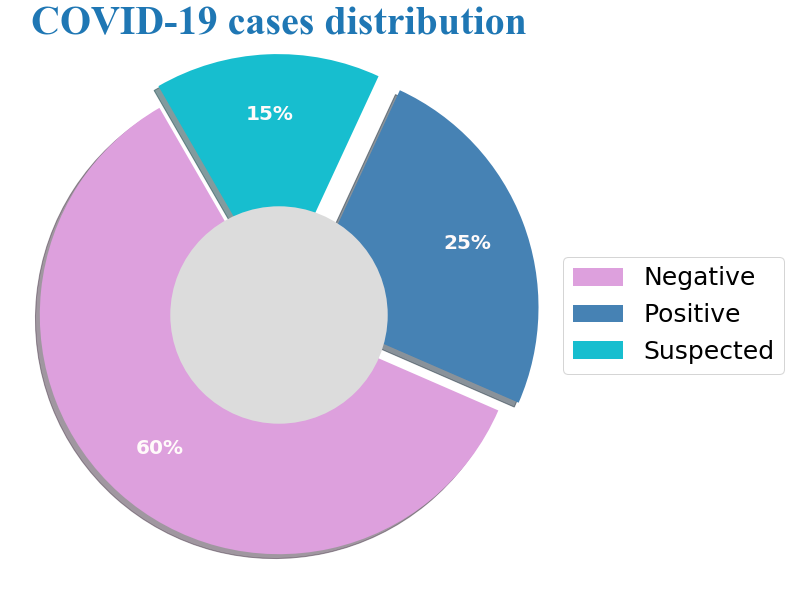

In [22]:
# Make a pie chart that illustrates the distribution of the COVID-19 cases results in Mexico
colors=['plum','steelblue','tab:cyan']
explode = (0, 0.1, 0.1)
covid_cases_count = covid_mx_clean_df_new['RESULTADO'].value_counts()
covid_cases_count.plot(kind='pie',labels=None,autopct='%1.0f%%',colors=colors,figsize=(15,10),fontsize=20,startangle=120,explode=explode,shadow=True,pctdistance=.75,textprops={'color':'snow','weight':'semibold'},radius=1.1)
plt.title('COVID-19 cases distribution',fontsize=40,color='tab:blue', fontweight='semibold', family='Times New Roman')
plt.axis('off')
plt.legend(labels=['Negative','Positive','Suspected'],loc='center left',prop={'size': 25}, bbox_to_anchor=(1.0, 0.5))
centre_circle = plt.Circle((0,0),0.50,fc='gainsboro')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('Results_visualizations/COVID-19_cases_distribution.png')
plt.show()

In [23]:
# Set a new dataframe with cases results for decease
covid_decease_cases_df = covid_mx_clean_df_new[['RESULTADO','FECHA_DEF']]
covid_decease_cases_df =  covid_decease_cases_df[covid_decease_cases_df['FECHA_DEF']!='2020-12-31']
covid_decease_cases_df = covid_decease_cases_df.groupby(covid_mx_clean_df_new['RESULTADO']).count()
del covid_decease_cases_df['RESULTADO']
covid_decease_cases_df

,FECHA_DEF
RESULTADO,
No Positivo SARS-CoV-2,1193
Positivo SARS-CoV-2,2507
Resultado Pendiente,224


In [24]:
# Set a new dataframe with cases results for intubated
covid_intubated_cases_df = covid_mx_clean_df_new[['RESULTADO','INTUBADO']]
covid_intubated_cases_df =  covid_intubated_cases_df[covid_intubated_cases_df['INTUBADO']=='Si ']
covid_intubated_cases_df = covid_intubated_cases_df.groupby(covid_mx_clean_df_new['RESULTADO']).count()
del covid_intubated_cases_df['RESULTADO']
covid_intubated_cases_df

,INTUBADO
RESULTADO,
No Positivo SARS-CoV-2,772
Positivo SARS-CoV-2,1101
Resultado Pendiente,252


In [25]:
# Set a new dataframe with cases results for ICU
covid_UCI_cases_df = covid_mx_clean_df_new[['RESULTADO','UCI']]
covid_UCI_cases_df =  covid_UCI_cases_df[covid_UCI_cases_df['UCI']=='Si ']
covid_UCI_cases_df = covid_UCI_cases_df.groupby(covid_mx_clean_df_new['RESULTADO']).count()
del covid_UCI_cases_df['RESULTADO']
covid_UCI_cases_df

,UCI
RESULTADO,
No Positivo SARS-CoV-2,1018
Positivo SARS-CoV-2,1073
Resultado Pendiente,261


In [26]:
# Set a new dataframe with cases results for total cases
covid_all_cases_df = covid_mx_clean_df_new[['RESULTADO']]
covid_all_cases_df = covid_all_cases_df.groupby(covid_mx_clean_df_new['RESULTADO']).count()
covid_all_cases_df

,RESULTADO
RESULTADO,
No Positivo SARS-CoV-2,63540
Positivo SARS-CoV-2,26025
Resultado Pendiente,16099


In [27]:
# Set a new dataframe with cases results for rest of cases
covid_rest_cases_df = pd.DataFrame({'RESULTADO':['No Positivo SARS-CoV-2','Positivo SARS-CoV-2','Resultado Pendiente'],'REST OF CASES':[60577,21344,15362]})
covid_rest_cases_df 

,RESULTADO,REST OF CASES
0,No Positivo SARS-CoV-2,60577
1,Positivo SARS-CoV-2,21344
2,Resultado Pendiente,15362


In [28]:
# Create a merged dataframe with risk values for stacked bar chart
covid_risk_cases_merge1_df = pd.merge(covid_decease_cases_df,covid_intubated_cases_df,on='RESULTADO',how='outer')
covid_risk_cases_merge2_df = pd.merge(covid_risk_cases_merge1_df,covid_UCI_cases_df,on='RESULTADO',how='outer')
covid_risk_cases_merge3_df = pd.merge(covid_risk_cases_merge2_df,covid_rest_cases_df,on='RESULTADO',how='outer')
covid_risk_cases_merge3_df

,RESULTADO,FECHA_DEF,INTUBADO,UCI,REST OF CASES
0,No Positivo SARS-CoV-2,1193,772,1018,60577
1,Positivo SARS-CoV-2,2507,1101,1073,21344
2,Resultado Pendiente,224,252,261,15362


In [29]:
# Filter merged table with positive cases for charts
covid_risk_positive_cases_merge2_df = covid_risk_cases_merge2_df.query('RESULTADO == "Positivo SARS-CoV-2"')
covid_risk_positive_cases_merge2_df

,FECHA_DEF,INTUBADO,UCI
RESULTADO,,,
Positivo SARS-CoV-2,2507,1101,1073


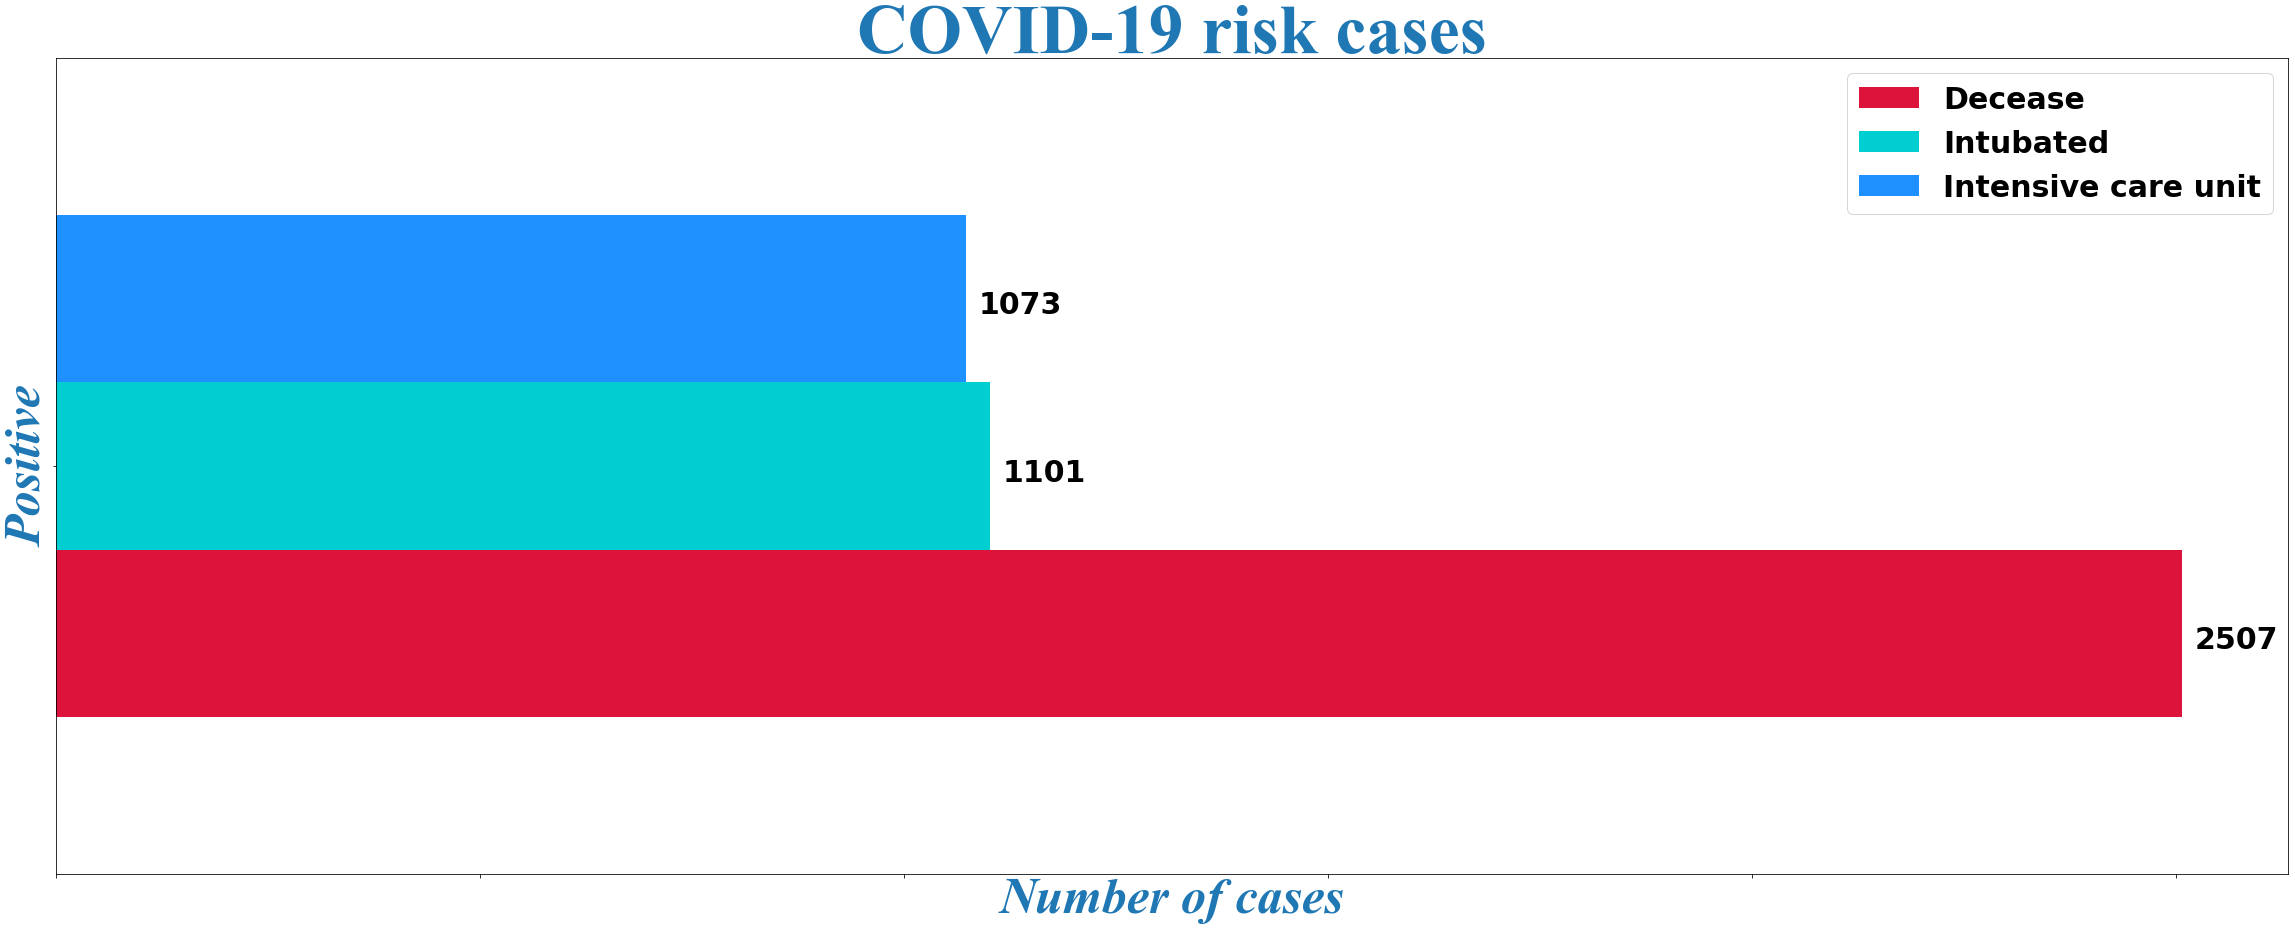

In [30]:
# Make a bar chart that illustrates the distribution of the COVID-19 risk cases results in Mexico
colors=['crimson','darkturquoise','dodgerblue']
ax = covid_risk_positive_cases_merge2_df.plot(kind='barh',figsize=(40,15), color=colors, align='center',width=0.8)
plt.xlabel('Number of cases',style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.ylabel('Positive',style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.title('COVID-19 risk cases',fontsize=70,color='tab:blue', family='Times New Roman')
plt.tick_params(axis=('y'), labelleft=False)
plt.tick_params(axis=('x'), labelbottom=False)
for i in ax.patches:
    ax.text(i.get_width()+15, i.get_y()+.11, str(round((i.get_width()), 2)),fontweight='semibold',fontsize=30, color='black')
plt.legend(['Decease','Intubated','Intensive care unit'],loc='upper right',prop={'size': 30,'weight':'bold'})
plt.savefig('Results_visualizations/COVID-19_risk_cases.png')
plt.show()

In [31]:
# Set a new dataframe with date and cases results
covid_cases_df = covid_mx_clean_df_new[['FECHA_INGRESO','RESULTADO']]
covid_cases_df.sort_values(by='FECHA_INGRESO',ascending=True)

,FECHA_INGRESO,RESULTADO
43099,2020-01-01,No Positivo SARS-CoV-2
66259,2020-01-01,No Positivo SARS-CoV-2
56225,2020-01-01,No Positivo SARS-CoV-2
43746,2020-01-01,No Positivo SARS-CoV-2
58171,2020-01-01,No Positivo SARS-CoV-2
...,...,...
102706,2020-05-05,Resultado Pendiente
102707,2020-05-05,Resultado Pendiente
102708,2020-05-05,Resultado Pendiente
102712,2020-05-05,Resultado Pendiente


In [32]:
# Accumulated positive COVID-19 cases per day
covid_cases_positive_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'Positivo SARS-CoV-2',:]
covid_cases_positive_df = covid_cases_positive_df.groupby(covid_cases_positive_df['FECHA_INGRESO']).count()
covid_cases_positive_df = covid_cases_positive_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_positive_df['POSITIVOS'] = covid_cases_positive_df.cumsum()
del covid_cases_positive_df['RESULTADO']
covid_cases_positive_df

,POSITIVOS
FECHA_INGRESO,
2020-01-08,1
2020-01-14,2
2020-02-07,3
2020-02-18,4
2020-02-27,8
...,...
2020-05-01,25291
2020-05-02,25739
2020-05-03,25942


In [33]:
# Accumulated negative COVID-19 cases per day
covid_cases_negative_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'No Positivo SARS-CoV-2',:]
covid_cases_negative_df = covid_cases_negative_df.groupby(covid_cases_negative_df['FECHA_INGRESO']).count()
covid_cases_negative_df = covid_cases_negative_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_negative_df['NEGATIVOS'] = covid_cases_negative_df.cumsum()
del covid_cases_negative_df['RESULTADO']
covid_cases_negative_df

,NEGATIVOS
FECHA_INGRESO,
2020-01-01,5
2020-01-02,21
2020-01-03,39
2020-01-04,45
2020-01-05,59
...,...
2020-05-01,62495
2020-05-02,63078
2020-05-03,63372


In [34]:
# Accumulated suspected COVID-19 cases per day
covid_cases_suspected_df = covid_cases_df.loc[covid_cases_df['RESULTADO'] == 'Resultado Pendiente',:]
covid_cases_suspected_df = covid_cases_suspected_df.groupby(covid_cases_suspected_df['FECHA_INGRESO']).count()
covid_cases_suspected_df = covid_cases_suspected_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_suspected_df['SOSPECHOSOS'] = covid_cases_suspected_df.cumsum()
del covid_cases_suspected_df['RESULTADO']
covid_cases_suspected_df

,SOSPECHOSOS
FECHA_INGRESO,
2020-02-01,1
2020-02-04,2
2020-02-14,3
2020-03-24,4
2020-03-25,6
2020-03-26,8
2020-03-27,12
2020-03-28,16
2020-03-29,18


In [35]:
# Accumulated decease COVID-19 for positive cases per day
covid_decease_positive_cases_df = covid_mx_clean_df_new[['RESULTADO','FECHA_DEF']]
covid_decease_positive_cases_df = covid_decease_positive_cases_df.query('RESULTADO == "Positivo SARS-CoV-2"')
covid_decease_positive_cases_df = covid_decease_positive_cases_df['FECHA_DEF'].loc[covid_mx_clean_df_new['FECHA_DEF']!='2020-12-31']
covid_decease_positive_cases_df = covid_decease_positive_cases_df.groupby(covid_mx_clean_df_new['FECHA_DEF']).count()
covid_decease_positive_cases_df = covid_decease_positive_cases_df.cumsum()
covid_decease_positive_cases_df

FECHA_DEF
2020-03-18       2
2020-03-20       3
2020-03-22       4
2020-03-23       5
2020-03-24       7
2020-03-25       9
2020-03-26      17
2020-03-27      23
2020-03-28      36
2020-03-29      44
2020-03-30      55
2020-03-31      76
2020-04-01      94
2020-04-02     119
2020-04-03     150
2020-04-04     180
2020-04-05     205
2020-04-06     257
2020-04-07     309
2020-04-08     353
2020-04-09     399
2020-04-10     455
2020-04-11     516
2020-04-12     575
2020-04-13     640
2020-04-14     714
2020-04-15     792
2020-04-16     854
2020-04-17     926
2020-04-18    1004
2020-04-19    1096
2020-04-20    1192
2020-04-21    1289
2020-04-22    1398
2020-04-23    1498
2020-04-24    1620
2020-04-25    1745
2020-04-26    1864
2020-04-27    1968
2020-04-28    2064
2020-04-29    2171
2020-04-30    2253
2020-05-01    2333
2020-05-02    2420
2020-05-03    2471
2020-05-04    2504
2020-05-05    2507
Name: FECHA_DEF, dtype: int64

In [36]:
# Merge table for plot
covid_cases_merge1_df = pd.merge(covid_cases_positive_df,covid_cases_negative_df,on='FECHA_INGRESO',how='outer')
covid_cases_merge2_df= pd.merge(covid_cases_merge1_df,covid_cases_suspected_df,on='FECHA_INGRESO',how='outer')
covid_cases_merge2_df = covid_cases_merge2_df.sort_values(by='FECHA_INGRESO',ascending=True)
covid_cases_merge2_df = covid_cases_merge2_df.fillna(method='ffill')
covid_cases_merge2_df

,POSITIVOS,NEGATIVOS,SOSPECHOSOS
FECHA_INGRESO,,,
2020-01-01,NaN,5,NaN
2020-01-02,NaN,21,NaN
2020-01-03,NaN,39,NaN
2020-01-04,NaN,45,NaN
2020-01-05,NaN,59,NaN
...,...,...,...
2020-05-01,25291.0,62495,6504.0
2020-05-02,25739.0,63078,7901.0
2020-05-03,25942.0,63372,9684.0


In [37]:
# Estimate the average growth rate of positive cases
covid_cases_agpositive_df = covid_cases_merge2_df['POSITIVOS']
covid_cases_agpositive_count_df= covid_cases_merge2_df['POSITIVOS'].count()
covid_cases_agpositive_df = ((covid_cases_agpositive_df.iloc[[-1]]/1)**(1/covid_cases_agpositive_count_df)-1).map('{:,.2%}'.format)
covid_cases_agpositive_df

FECHA_INGRESO
2020-05-05    8.92%
Name: POSITIVOS, dtype: object

In [38]:
# Estimate the average growth rate of negative cases
covid_cases_agnegative_df = covid_cases_merge2_df['NEGATIVOS']
covid_cases_agnegative_count_df= covid_cases_merge2_df['NEGATIVOS'].count()
covid_cases_agnegative_df = ((covid_cases_agnegative_df.iloc[[-1]]/5)**(1/covid_cases_agnegative_count_df)-1).map('{:,.2%}'.format)
covid_cases_agnegative_df

FECHA_INGRESO
2020-05-05    7.79%
Name: NEGATIVOS, dtype: object

In [39]:
# Estimate the average growth rate of suspected cases
covid_cases_agsuspected_df = covid_cases_merge2_df['SOSPECHOSOS']
covid_cases_agsuspected_count_df= covid_cases_merge2_df['SOSPECHOSOS'].count()
covid_cases_agsuspected_df = ((covid_cases_agsuspected_df.iloc[[-1]]/1)**(1/covid_cases_agsuspected_count_df)-1).map('{:,.2%}'.format)
covid_cases_agsuspected_df

FECHA_INGRESO
2020-05-05    10.73%
Name: SOSPECHOSOS, dtype: object

In [40]:
# Estimate the average growth rate of decease for positive cases
covid_cases_agdecease_df = '{:,.2%}'.format((covid_risk_cases_merge2_df.iloc[1]['FECHA_DEF']/2)**(1/covid_decease_positive_cases_df.shape[0])-1)
covid_cases_agdecease_df

'16.39%'

In [41]:
# Create a dataframe with the positive cases for contingency phase I
covid_cases_positive_df = covid_cases_positive_df.reset_index()
covid_positive_cases_phaseI = covid_cases_positive_df[(covid_cases_positive_df['FECHA_INGRESO'] >= '2020-02-29') & (covid_cases_positive_df['FECHA_INGRESO'] < '2020-03-24')]
covid_positive_cases_phaseI

,FECHA_INGRESO,POSITIVOS
6,2020-02-29,11
7,2020-03-02,13
8,2020-03-04,15
9,2020-03-05,16
10,2020-03-08,20
11,2020-03-09,22
12,2020-03-10,31
13,2020-03-11,58
14,2020-03-12,86
15,2020-03-13,146


In [42]:
# Create a dataframe with the positive cases for contingency phase II
covid_positive_cases_phaseII = covid_cases_positive_df[(covid_cases_positive_df['FECHA_INGRESO'] >= '2020-03-24') & (covid_cases_positive_df['FECHA_INGRESO'] < '2020-04-21')]
covid_positive_cases_phaseII

,FECHA_INGRESO,POSITIVOS
26,2020-03-24,1090
27,2020-03-25,1223
28,2020-03-26,1388
29,2020-03-27,1592
30,2020-03-28,1738
31,2020-03-29,1878
32,2020-03-30,2172
33,2020-03-31,2439
34,2020-04-01,2746
35,2020-04-02,3023


In [43]:
# Create a dataframe with the positive cases for contingency phase III
covid_positive_cases_phaseIII = covid_cases_positive_df[(covid_cases_positive_df['FECHA_INGRESO'] >= '2020-04-21') & (covid_cases_positive_df['FECHA_INGRESO'] <= '2020-05-05')]
covid_positive_cases_phaseIII

,FECHA_INGRESO,POSITIVOS
54,2020-04-21,14658
55,2020-04-22,15764
56,2020-04-23,16946
57,2020-04-24,18304
58,2020-04-25,19101
59,2020-04-26,19844
60,2020-04-27,21253
61,2020-04-28,22609
62,2020-04-29,23776
63,2020-04-30,24786


In [44]:
# Estimate the average growth rate for positive cases in contingency phase I
covid_cases_agpositive_phaseI_count= covid_positive_cases_phaseI['POSITIVOS'].count()
covid_cases_agpositive_phaseI = ((covid_positive_cases_phaseI['POSITIVOS'].iloc[[-1]]/11)**(1/covid_cases_agpositive_phaseI_count)-1).map('{:,.2%}'.format)
covid_cases_agpositive_phaseI

25    24.84%
Name: POSITIVOS, dtype: object

In [45]:
# Estimate the average growth rate for positive cases in contingency phase II
covid_cases_agpositive_phaseII_count= covid_positive_cases_phaseII['POSITIVOS'].count()
covid_cases_agpositive_phaseII = ((covid_positive_cases_phaseII['POSITIVOS'].iloc[[-1]]/1090)**(1/covid_cases_agpositive_phaseII_count)-1).map('{:,.2%}'.format)
covid_cases_agpositive_phaseII

53    9.39%
Name: POSITIVOS, dtype: object

In [46]:
# Estimate the average growth rate for positive cases in contingency phase III
covid_cases_agpositive_phaseIII_count= covid_positive_cases_phaseIII['POSITIVOS'].count()
covid_cases_agpositive_phaseIII = ((covid_positive_cases_phaseIII['POSITIVOS'].iloc[[-1]]/14658)**(1/covid_cases_agpositive_phaseIII_count)-1).map('{:,.2%}'.format)
covid_cases_agpositive_phaseIII

68    3.90%
Name: POSITIVOS, dtype: object

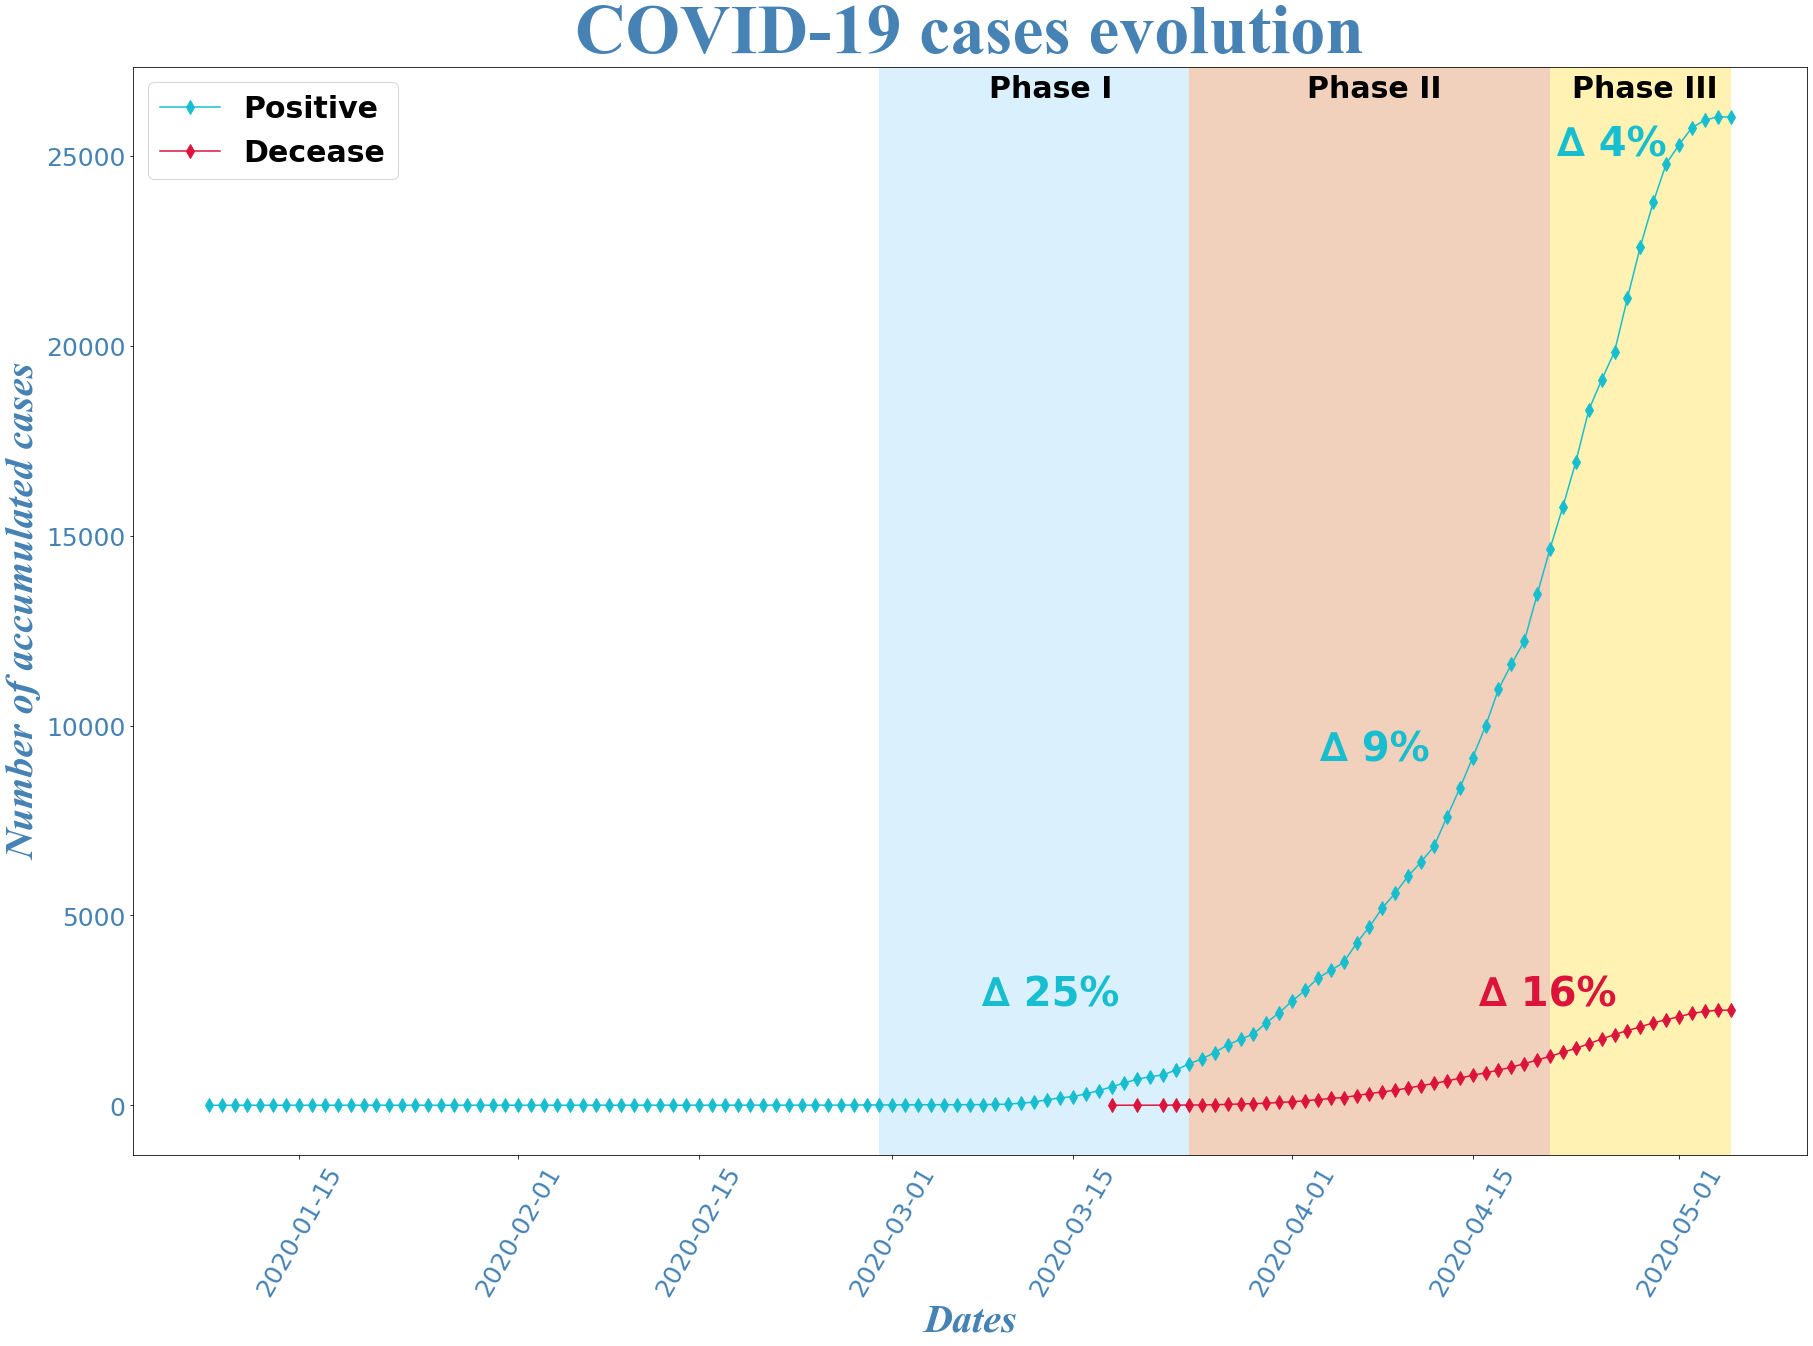

In [47]:
# Make a plot chart that illustrates the distribution of the COVID-19 cases in Mexico considering the phases of contingency
plt.figure(figsize=(30,20))
plt.plot(covid_cases_merge2_df['POSITIVOS'],marker='d', linestyle='-',ms=10,color='tab:cyan',linewidth=1.5,label='Positive')
plt.plot(covid_decease_positive_cases_df,marker='d', linestyle='-',ms=10,color='crimson',linewidth=1.5,label='Decease')
plt.xlabel('Dates',style='italic',color='steelblue',family='Times New Roman',fontsize=40)
plt.ylabel('Number of accumulated cases',style='italic',color='steelblue',family='Times New Roman',fontsize=40)
plt.title('COVID-19 cases evolution',fontsize=70,color='steelblue',fontweight='semibold', family='Times New Roman')
plt.xticks(rotation=60,color='steelblue',fontsize=25)
plt.yticks(np.arange(0, 27000, step=5000),color='steelblue',fontsize=25)
legend1=plt.legend(loc='upper left',prop={'size': 30,'weight':'bold'})
plt.axvspan('2020-02-29','2020-03-24',facecolor='lightskyblue', alpha=0.3)
phaseII=plt.axvspan('2020-03-24','2020-04-21',facecolor='chocolate', alpha=0.3)
phaseIII=plt.axvspan('2020-04-21','2020-05-05',facecolor='gold', alpha=0.3)
plt.figtext(0.55, 0.875,'Phase I', wrap=True,ha='center',va='top',fontsize=30,fontweight='bold')
plt.figtext(0.70, 0.875,'Phase II', wrap=True,ha='center',va='top',fontsize=30,fontweight='bold')
plt.figtext(0.825, 0.875,'Phase III', wrap=True,ha='center',va='top',fontsize=30,fontweight='bold')
plt.figtext(0.55, 0.25,'∆ 25%', wrap=True,ha='center',color='tab:cyan',va='top',fontsize=40,fontweight='bold')
plt.figtext(0.70, 0.42,'∆ 9%', wrap=True,ha='center',color='tab:cyan',va='top',fontsize=40,fontweight='bold')
plt.figtext(0.81, 0.84,'∆ 4%', wrap=True,ha='center',color='tab:cyan',va='top',fontsize=40,fontweight='bold')
plt.figtext(0.78, 0.25,'∆ 16%', wrap=True,ha='center',color='crimson',va='top',fontsize=40,fontweight='bold')
plt.savefig('Results_visualizations/COVID-19_cases_evolution.png')
plt.show()

# Age and Gender risk mortality

In [48]:
# Convert text date columns into datetime and replace 9999-99-99 for 2020-12-31 as date of still alive
covid_mx_clean_df_2 = covid_mx_clean_df.copy()
covid_mx_clean_df_2['FECHA_DEF'] = covid_mx_clean_df_2['FECHA_DEF'].replace('9999-99-99','2020-12-31')
covid_mx_clean_df_2['FECHA_DEF'] = pd.to_datetime(covid_mx_clean_df_2['FECHA_DEF'], format='%Y-%m-%d')
covid_mx_clean_df_2

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [49]:
# Set a new dataframe with cases results
CasosCovidDf = covid_mx_clean_df_2[['RESULTADO']]
CasosCovidDf = CasosCovidDf.groupby(covid_mx_clean_df_2['RESULTADO']).count()
CasosCovidDf

,RESULTADO
RESULTADO,
No Positivo SARS-CoV-2,63540
Positivo SARS-CoV-2,26025
Resultado Pendiente,16099


In [50]:
# Set a new dataframe with cases results for male gender
ResultadoSexoDf = covid_mx_clean_df_2[['RESULTADO','SEXO']]
ResultadoSexoDf =  ResultadoSexoDf[ResultadoSexoDf['SEXO']=='Hombre']
ResultadoSexoDf = ResultadoSexoDf.groupby(covid_mx_clean_df_2['RESULTADO']).count()
del ResultadoSexoDf['RESULTADO']
ResultadoSexoDf

,SEXO
RESULTADO,
No Positivo SARS-CoV-2,30098
Positivo SARS-CoV-2,15201
Resultado Pendiente,8588


In [51]:
# Set a new dataframe with cases results for female gender
ResultadoSexoDf2 = covid_mx_clean_df_2[['RESULTADO','SEXO']]
ResultadoSexoDf2 =  ResultadoSexoDf2[ResultadoSexoDf2['SEXO']=='Mujer']
ResultadoSexoDf2 = ResultadoSexoDf2.groupby(covid_mx_clean_df_2['RESULTADO']).count()
del ResultadoSexoDf2['RESULTADO']
ResultadoSexoDf2

,SEXO
RESULTADO,
No Positivo SARS-CoV-2,33442
Positivo SARS-CoV-2,10824
Resultado Pendiente,7511


In [52]:
# Merge table for plot
ResultadoSEXOS = pd.merge(ResultadoSexoDf,ResultadoSexoDf2,on= "RESULTADO",how="outer")
ResultadoSEXOS ['Male'] = ResultadoSEXOS['SEXO_x']
ResultadoSEXOS ['Female'] = ResultadoSEXOS['SEXO_y']
del ResultadoSEXOS['SEXO_x']
del ResultadoSEXOS['SEXO_y']
ResultadoSEXOS

,Male,Female
RESULTADO,,
No Positivo SARS-CoV-2,30098,33442
Positivo SARS-CoV-2,15201,10824
Resultado Pendiente,8588,7511


In [53]:
# Filter by positive cases
ResultadoSEXOS2 = ResultadoSEXOS.query('RESULTADO == "Positivo SARS-CoV-2"')
ResultadoSEXOS2

,Male,Female
RESULTADO,,
Positivo SARS-CoV-2,15201,10824


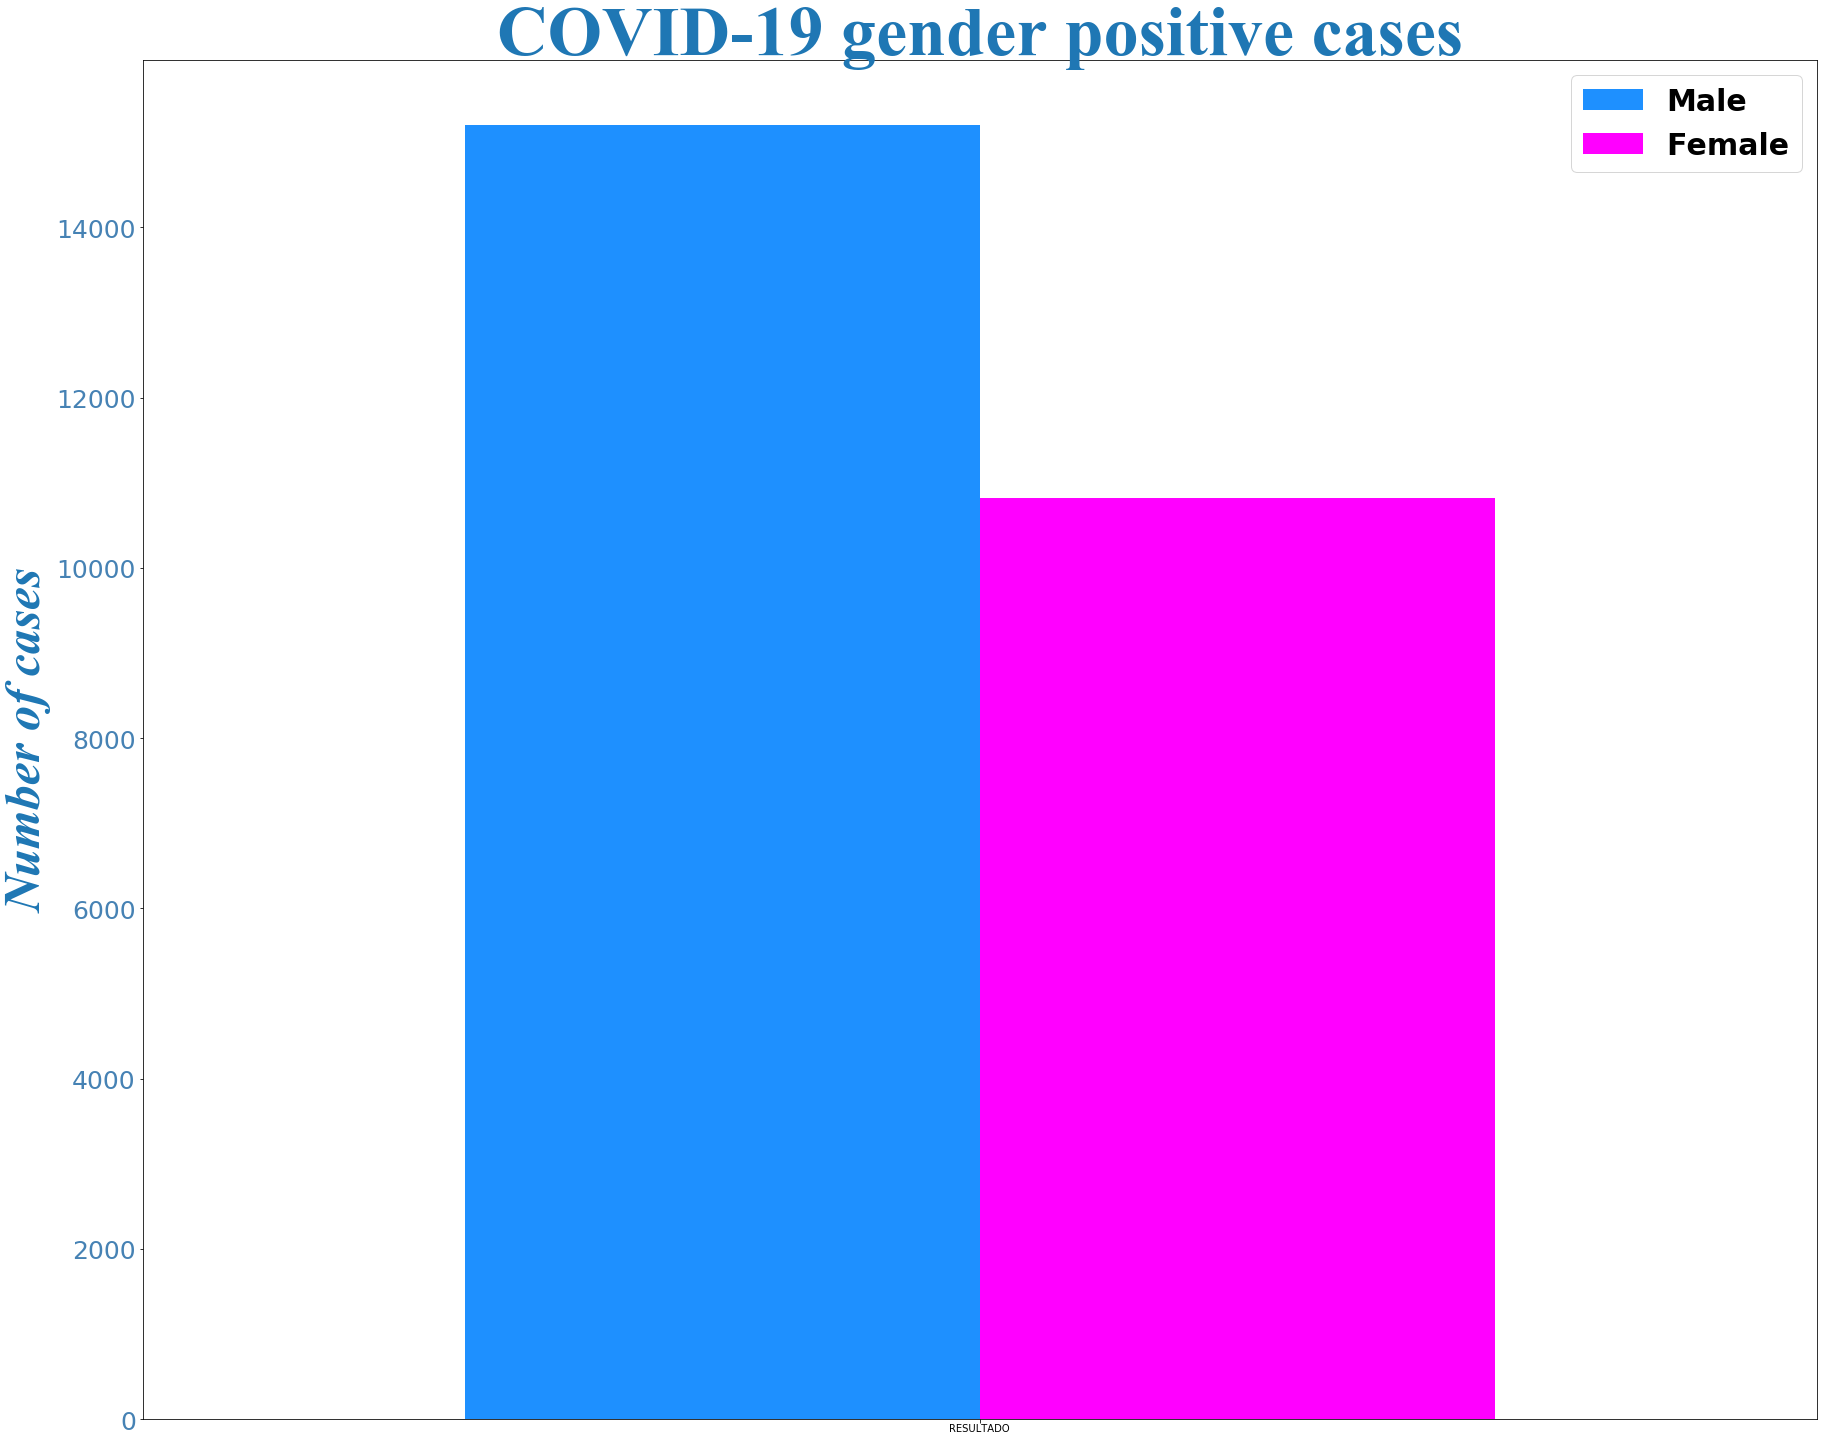

In [54]:
# Make a bar chart that illustrates the distribution of the COVID-19 positive cases in Mexico by gender
colors=['dodgerblue','magenta']
SexPlot= ResultadoSEXOS2.plot.bar(rot= 0, figsize=(30,25), color=colors, align='center',width=0.8)
plt.ylabel('Number of cases',style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.title('COVID-19 gender positive cases',fontsize=70,color='tab:blue', family='Times New Roman')
plt.tick_params(axis=('x'), labelbottom=False)
plt.yticks(np.arange(0, 16000, step=2000),color='steelblue',fontsize=25)
plt.legend(labels=['Male','Female'],loc='upper right',prop={'size': 30,'weight':'bold'})
plt.savefig('Results_visualizations/COVID-19_gender.png')
plt.show()

In [55]:
# Review age column data
CovidEdadDF = covid_mx_clean_df_2[['EDAD']]
CovidEdadDF

,EDAD
0,29
1,64
2,64
3,41
4,69
...,...
105659,70
105660,42
105661,23
105662,36


In [56]:
# Set a new dataframe with cases results by age
CasosEdadDf= covid_mx_clean_df_2[['RESULTADO','EDAD']]
CasosEdadDf

,RESULTADO,EDAD
0,Positivo SARS-CoV-2,29
1,Positivo SARS-CoV-2,64
2,No Positivo SARS-CoV-2,64
3,No Positivo SARS-CoV-2,41
4,No Positivo SARS-CoV-2,69
...,...,...
105659,Resultado Pendiente,70
105660,Resultado Pendiente,42
105661,Resultado Pendiente,23
105662,Resultado Pendiente,36


In [57]:
# Segment by age under 20 years old 
Arriba00= CasosEdadDf[CasosEdadDf['EDAD']< 20]
Arriba00= Arriba00.groupby(Arriba00['RESULTADO']).count()
Arriba00= Arriba00.rename(columns={'EDAD': '0-19'})
Arriba00

,0-19
RESULTADO,
No Positivo SARS-CoV-2,5694
Positivo SARS-CoV-2,579
Resultado Pendiente,688


In [58]:
# Segment by age between 20 years old until 29 years old 
Arriba20= CasosEdadDf[(CasosEdadDf['EDAD']>= 20) & (CasosEdadDf['EDAD']<30)]
Arriba20 =  Arriba20.groupby(Arriba20['RESULTADO']).count()
Arriba20= Arriba20.rename(columns={'EDAD': '20-29'})
Arriba20

,20-29
RESULTADO,
No Positivo SARS-CoV-2,12004
Positivo SARS-CoV-2,2869
Resultado Pendiente,2234


In [59]:
# Segment by age between 30 years old until 39 years old 
Arriba30= CasosEdadDf[(CasosEdadDf['EDAD']>= 30) & (CasosEdadDf['EDAD']<40)]
Arriba30 =  Arriba30.groupby(Arriba30['RESULTADO']).count()
Arriba30= Arriba30.rename(columns={'EDAD': '30-39'})
Arriba30

,30-39
RESULTADO,
No Positivo SARS-CoV-2,16146
Positivo SARS-CoV-2,5657
Resultado Pendiente,3900


In [60]:
# Segment by age between 40 years old until 49 years old 
Arriba40= CasosEdadDf[(CasosEdadDf['EDAD']>= 40) & (CasosEdadDf['EDAD']<50)]
Arriba40 =  Arriba40.groupby(Arriba40['RESULTADO']).count()
Arriba40= Arriba40.rename(columns={'EDAD': '40-49'})
Arriba40

,40-49
RESULTADO,
No Positivo SARS-CoV-2,12790
Positivo SARS-CoV-2,6185
Resultado Pendiente,3784


In [61]:
# Segment by age between 50 years old until 59 years old 
Arriba50= CasosEdadDf[(CasosEdadDf['EDAD']>= 50) & (CasosEdadDf['EDAD']<60)]
Arriba50 =  Arriba50.groupby(Arriba50['RESULTADO']).count()
Arriba50= Arriba50.rename(columns={'EDAD': '50-59'})
Arriba50

,50-59
RESULTADO,
No Positivo SARS-CoV-2,8419
Positivo SARS-CoV-2,5340
Resultado Pendiente,2873


In [62]:
# Segment by age between 60 years old until 69 years old
Arriba60= CasosEdadDf[(CasosEdadDf['EDAD']>= 60) & (CasosEdadDf['EDAD']<70)]
Arriba60 =  Arriba60.groupby(Arriba60['RESULTADO']).count()
Arriba60= Arriba60.rename(columns={'EDAD': '60-69'})
Arriba60

,60-69
RESULTADO,
No Positivo SARS-CoV-2,4508
Positivo SARS-CoV-2,3264
Resultado Pendiente,1517


In [63]:
# Segment by age between 70 years old until 79 years old
Arriba70= CasosEdadDf[(CasosEdadDf['EDAD']>= 70) & (CasosEdadDf['EDAD']<80)]
Arriba70 =  Arriba70.groupby(Arriba70['RESULTADO']).count()
Arriba70= Arriba70.rename(columns={'EDAD': '70-79'})
Arriba70

,70-79
RESULTADO,
No Positivo SARS-CoV-2,2417
Positivo SARS-CoV-2,1536
Resultado Pendiente,752


In [64]:
# Segment by age higher or equal than 80 years old
Arriba80= CasosEdadDf[CasosEdadDf['EDAD']>= 80]
Arriba80= Arriba80.groupby(Arriba80['RESULTADO']).count()
Arriba80= Arriba80.rename(columns={'EDAD': '+80'})
Arriba80

,+80
RESULTADO,
No Positivo SARS-CoV-2,1562
Positivo SARS-CoV-2,595
Resultado Pendiente,351


In [65]:
# Merge table for plot
ContagionAge = pd.merge(Arriba00,Arriba20,on= "RESULTADO",how="outer")
ContagionAge2 = pd.merge(ContagionAge,Arriba30,on= "RESULTADO",how="outer")
ContagionAge3 = pd.merge(ContagionAge2,Arriba40,on= "RESULTADO",how="outer")
ContagionAge4 = pd.merge(ContagionAge3,Arriba50,on= "RESULTADO",how="outer")
ContagionAge5 = pd.merge(ContagionAge4,Arriba60,on= "RESULTADO",how="outer")
ContagionAge6 = pd.merge(ContagionAge5,Arriba70,on= "RESULTADO",how="outer")
ContagionAge7 = pd.merge(ContagionAge6,Arriba80,on= "RESULTADO",how="outer")
ContagionAge7

,0-19,20-29,30-39,40-49,50-59,60-69,70-79,+80
RESULTADO,,,,,,,,
No Positivo SARS-CoV-2,5694,12004,16146,12790,8419,4508,2417,1562
Positivo SARS-CoV-2,579,2869,5657,6185,5340,3264,1536,595
Resultado Pendiente,688,2234,3900,3784,2873,1517,752,351


In [66]:
# Filter merged table with positive cases for charts
ContagionAge7 = ContagionAge7.query('RESULTADO == "Positivo SARS-CoV-2"')
ContagionAge7

,0-19,20-29,30-39,40-49,50-59,60-69,70-79,+80
RESULTADO,,,,,,,,
Positivo SARS-CoV-2,579,2869,5657,6185,5340,3264,1536,595


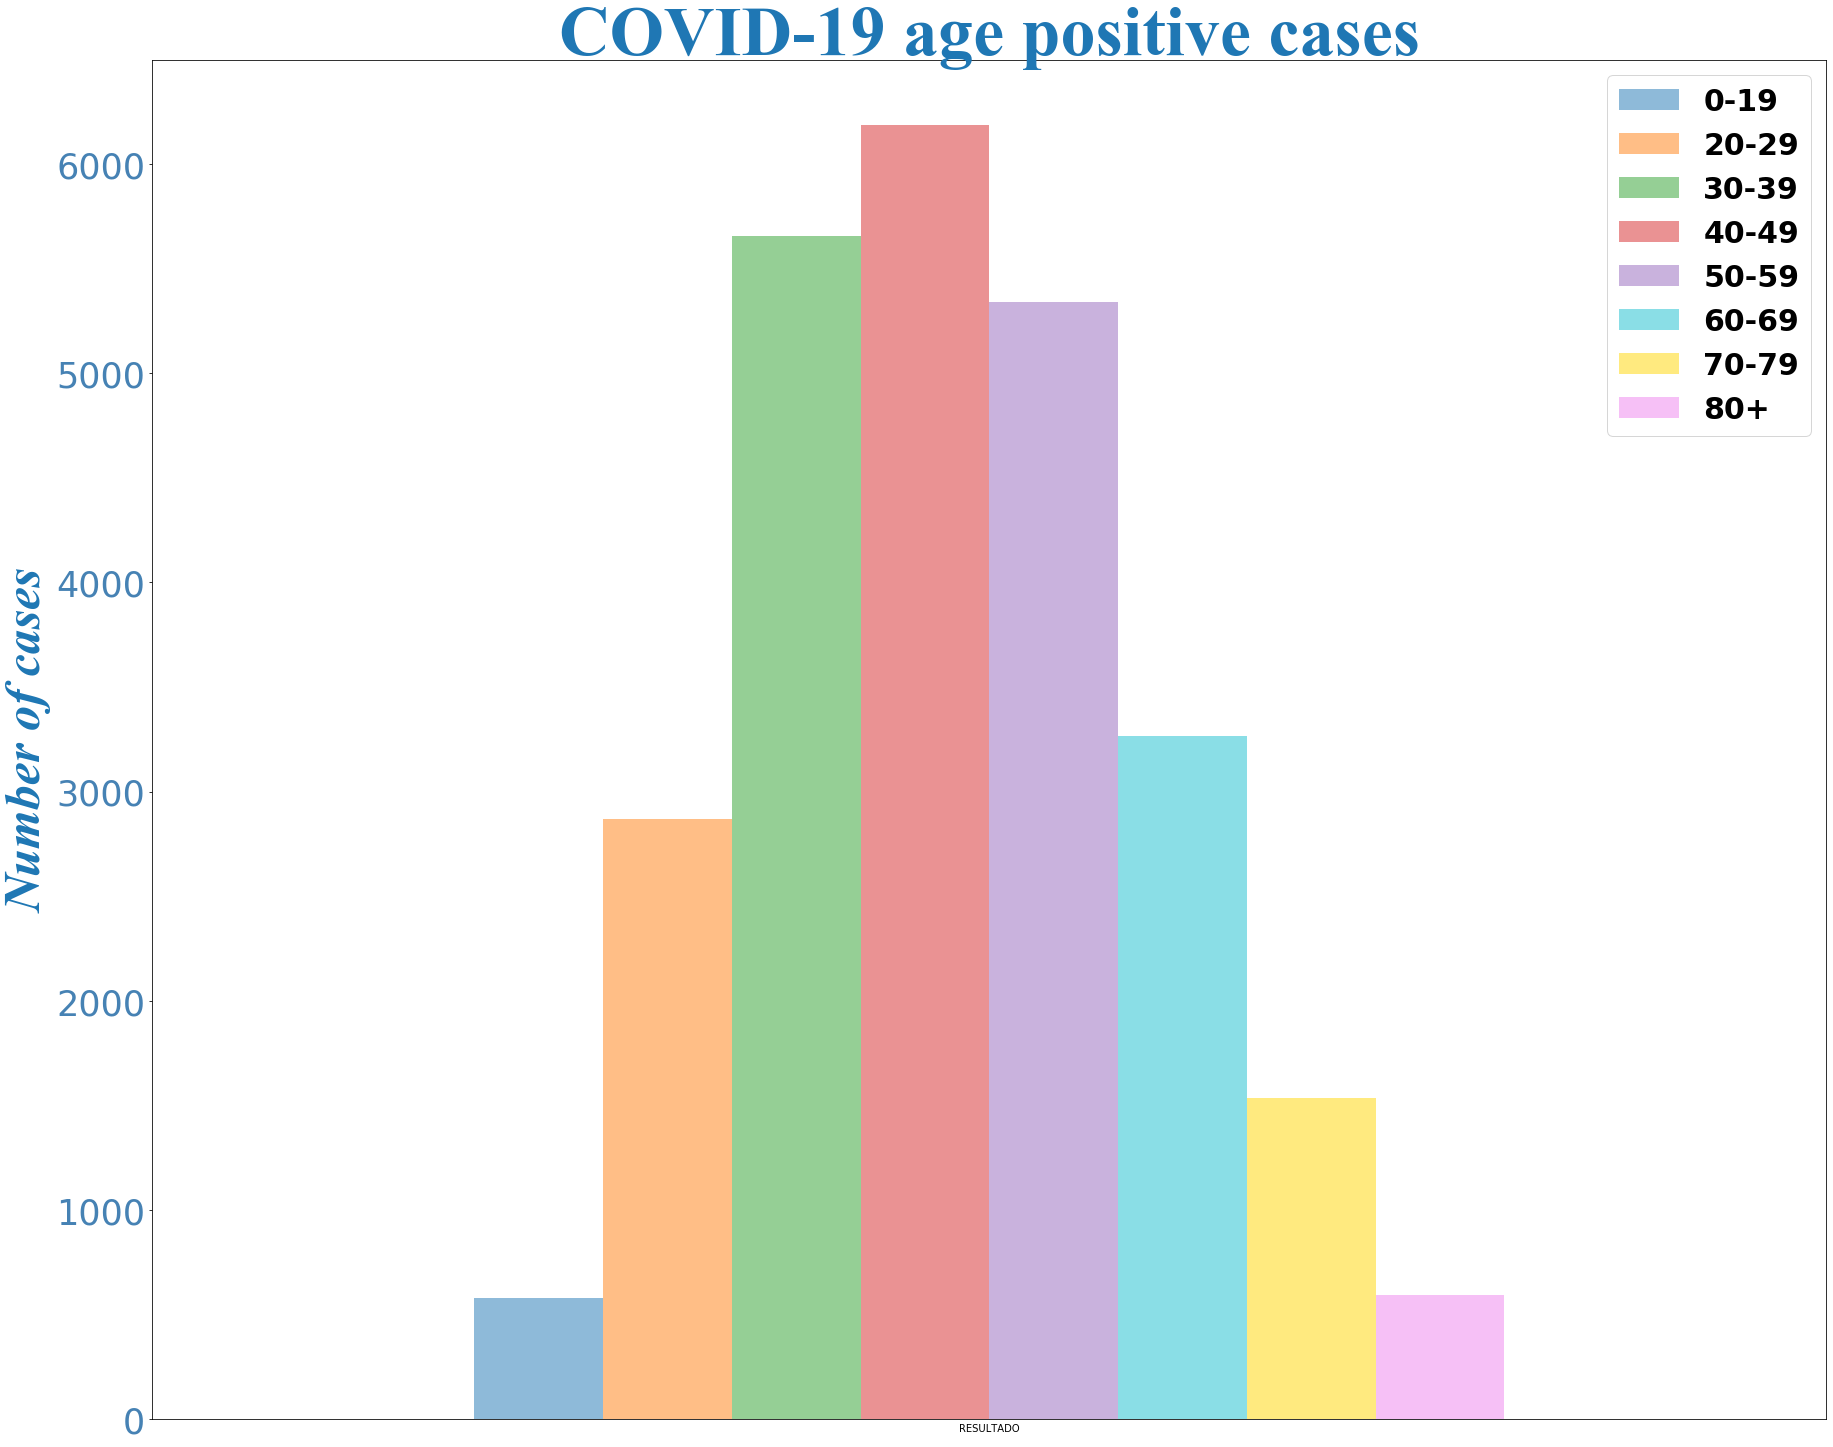

In [67]:
# Make a bar chart that illustrates the distribution of the COVID-19 positive cases in Mexico by age
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','gold','violet']
ContagionPlot= ContagionAge7.plot.bar(rot= 0, figsize=(30,25), color=colors, alpha=0.5, align='center',width=0.8)
plt.ylabel('Number of cases',style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.title('COVID-19 age positive cases',fontsize=70,color='tab:blue', family='Times New Roman')
plt.tick_params(axis=('x'), which='both', bottom=False, labelbottom=False)
plt.yticks(np.arange(0, 7000, step=1000),color='steelblue',fontsize=35)
plt.legend(labels=['0-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'],loc='upper right',prop={'size': 30,'weight':'bold'})
plt.savefig('Results_visualizations/COVID-19_age.png')
plt.show()

In [68]:
# Set a new dataframe with cases results age and decease
MuertesCovidDf = covid_mx_clean_df_2[[ 'RESULTADO','EDAD','FECHA_DEF' ]]
MuertesCovidDf

,RESULTADO,EDAD,FECHA_DEF
0,Positivo SARS-CoV-2,29,2020-12-31
1,Positivo SARS-CoV-2,64,2020-04-11
2,No Positivo SARS-CoV-2,64,2020-03-30
3,No Positivo SARS-CoV-2,41,2020-12-31
4,No Positivo SARS-CoV-2,69,2020-12-31
...,...,...,...
105659,Resultado Pendiente,70,2020-12-31
105660,Resultado Pendiente,42,2020-12-31
105661,Resultado Pendiente,23,2020-12-31
105662,Resultado Pendiente,36,2020-12-31


In [69]:
# Filter by positive cases
MortandadCovid= MuertesCovidDf[(MuertesCovidDf['RESULTADO']== "Positivo SARS-CoV-2")]
MortandadCovid

,RESULTADO,EDAD,FECHA_DEF
0,Positivo SARS-CoV-2,29,2020-12-31
1,Positivo SARS-CoV-2,64,2020-04-11
15,Positivo SARS-CoV-2,45,2020-12-31
28,Positivo SARS-CoV-2,45,2020-12-31
29,Positivo SARS-CoV-2,35,2020-12-31
...,...,...,...
105286,Positivo SARS-CoV-2,24,2020-12-31
105288,Positivo SARS-CoV-2,20,2020-12-31
105393,Positivo SARS-CoV-2,37,2020-12-31
105471,Positivo SARS-CoV-2,30,2020-12-31


In [70]:
# Filter by decease date
MortandadCovid2= MortandadCovid[(MortandadCovid['FECHA_DEF']!= '2020-12-31')]
MortandadCovid2

,RESULTADO,EDAD,FECHA_DEF
1,Positivo SARS-CoV-2,64,2020-04-11
116,Positivo SARS-CoV-2,69,2020-03-27
147,Positivo SARS-CoV-2,39,2020-03-31
177,Positivo SARS-CoV-2,73,2020-03-29
180,Positivo SARS-CoV-2,37,2020-04-09
...,...,...,...
102761,Positivo SARS-CoV-2,57,2020-05-03
102774,Positivo SARS-CoV-2,84,2020-05-03
103902,Positivo SARS-CoV-2,64,2020-05-02
104339,Positivo SARS-CoV-2,53,2020-05-03


In [71]:
# Segment by age under 20 years old 
Muertes00= MortandadCovid2[MortandadCovid2['EDAD']< 20]
Muertes00= MortandadCovid2.groupby(Muertes00['RESULTADO']).count()
Muertes00= Muertes00.rename(columns={'EDAD': '0-19'})
del Muertes00['RESULTADO']
del Muertes00['FECHA_DEF']
Muertes00

,0-19
RESULTADO,
Positivo SARS-CoV-2,7


In [72]:
# Segment by age between 20 years old until 39 years old 
Muertes20= MortandadCovid2[(MortandadCovid2['EDAD']>= 20) & (MortandadCovid2['EDAD']<40)]
Muertes20= MortandadCovid2.groupby(Muertes20['RESULTADO']).count()
Muertes20= Muertes20.rename(columns={'EDAD': '20-39'})
del Muertes20['RESULTADO']
del Muertes20['FECHA_DEF']
Muertes20

,20-39
RESULTADO,
Positivo SARS-CoV-2,187


In [73]:
# Segment by age between 40 years old until 59 years old 
Muertes40= MortandadCovid2[(MortandadCovid2['EDAD']>= 40) & (MortandadCovid2['EDAD']<60)]
Muertes40= MortandadCovid2.groupby(Muertes40['RESULTADO']).count()
Muertes40= Muertes40.rename(columns={'EDAD': '40-59'})
del Muertes40['RESULTADO']
del Muertes40['FECHA_DEF']
Muertes40

,40-59
RESULTADO,
Positivo SARS-CoV-2,1093


In [74]:
# Segment by age between 60 years old until 79 years old 
Muertes60= MortandadCovid2[(MortandadCovid2['EDAD']>= 60) & (MortandadCovid2['EDAD']<80)]
Muertes60= MortandadCovid2.groupby(Muertes60['RESULTADO']).count()
Muertes60= Muertes60.rename(columns={'EDAD': '60-79'})
del Muertes60['RESULTADO']
del Muertes60['FECHA_DEF']
Muertes60

,60-79
RESULTADO,
Positivo SARS-CoV-2,1043


In [75]:
# Segment by age higher or equal than 80 years old
Muertes80= MortandadCovid2[MortandadCovid2['EDAD']>= 80]
Muertes80= MortandadCovid2.groupby(Muertes80['RESULTADO']).count()
Muertes80= Muertes80.rename(columns={'EDAD': '80+'})
del Muertes80['RESULTADO']
del Muertes80['FECHA_DEF']
Muertes80

,80+
RESULTADO,
Positivo SARS-CoV-2,177


In [76]:
# Merge table for plot
DeathAge = pd.merge(Muertes00,Muertes20,on= "RESULTADO",how="outer")
DeathAge2 = pd.merge(DeathAge,Muertes40,on= "RESULTADO",how="outer")
DeathAge3 = pd.merge(DeathAge2,Muertes60,on= "RESULTADO",how="outer")
DeathAge4 = pd.merge(DeathAge3,Muertes80,on= "RESULTADO",how="outer")
DeathAge4

,0-19,20-39,40-59,60-79,80+
RESULTADO,,,,,
Positivo SARS-CoV-2,7,187,1093,1043,177


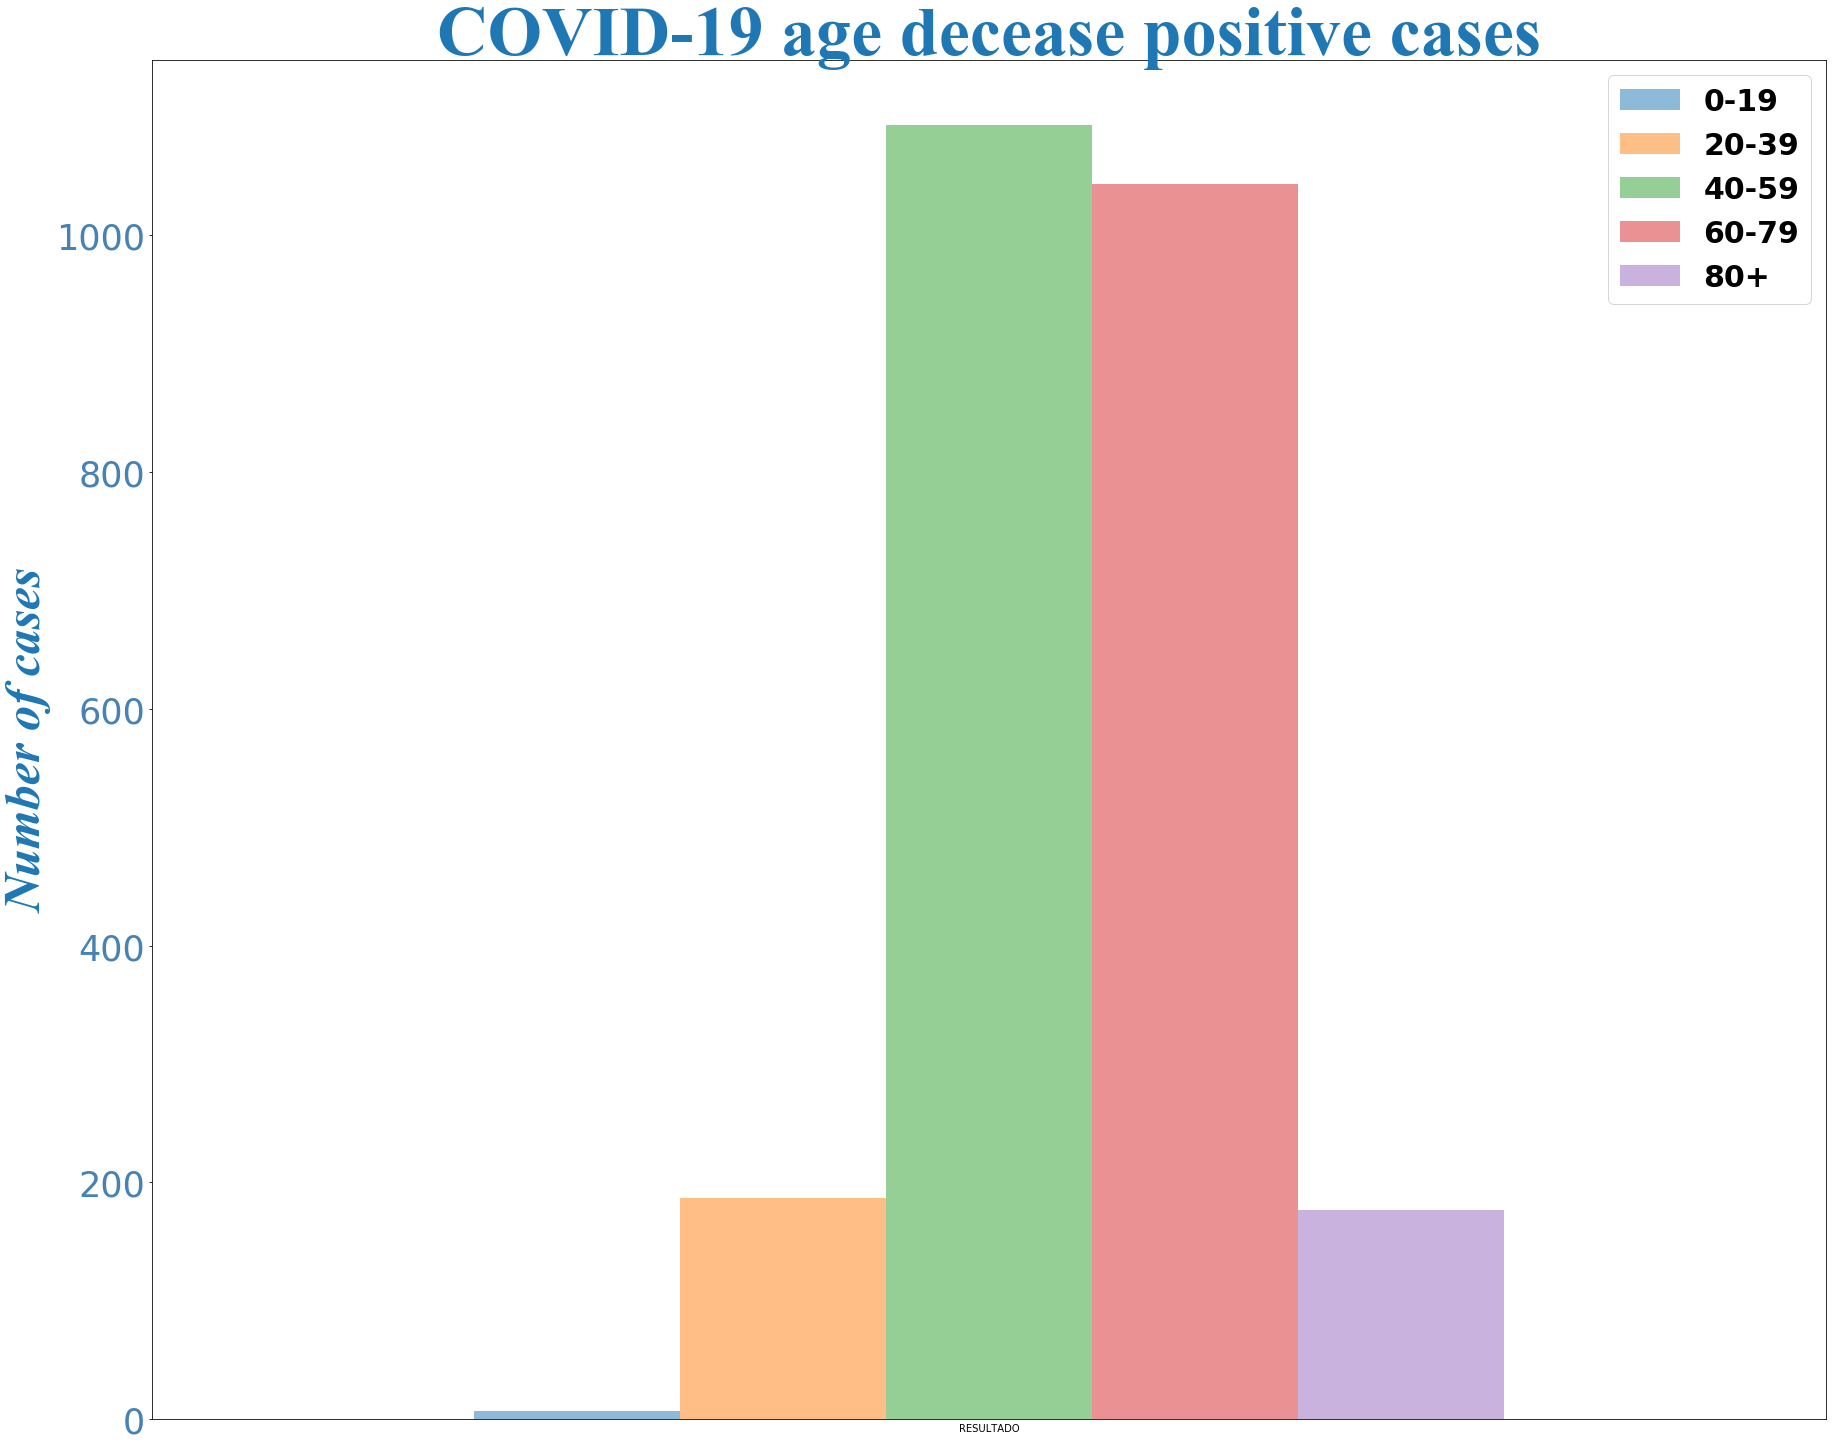

In [77]:
# Make a bar chart that illustrates the distribution of the COVID-19 decease positive cases in Mexico by age
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
DeathPlot= DeathAge4.plot.bar(rot= 0, figsize=(30,25), color=colors, alpha=0.5, align='center',width=0.8)
plt.ylabel('Number of cases',style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.title('COVID-19 age decease positive cases',fontsize=70,color='tab:blue', family='Times New Roman')
plt.tick_params(axis=('x'), which='both', bottom=False, labelbottom=False)
plt.yticks(np.arange(0, 1200, step=200),color='steelblue',fontsize=35)
plt.legend(labels=['0-19', '20-39', '40-59', '60-79','80+'],loc='upper right',prop={'size': 30,'weight':'bold'})
plt.savefig('Results_visualizations/COVID-19_age_decease.png')
plt.show()

# Pre-existing diseases associated with COVID-19

In [78]:
# Select the Dataframe with positive cases of COVID-19 and end decease after
df = covid_mx_clean_df[covid_mx_clean_df.FECHA_DEF!="9999-99-99"]
df = df[df.RESULTADO=="Positivo SARS-CoV-2"]
df.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
116,0b3101,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-21,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,Si
147,0a34f3,USMER,IMSS,Zacatecas,Hombre,Zacatecas,Zacatecas,Matamoros,Hospitalizado,2020-03-16,...,No,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
177,0f2f41,USMER,IMSS,Ciudad De Mexico,Mujer,Guanajuato,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-27,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
180,041aaf,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Rincon De Romos,Hospitalizado,2020-03-28,...,No,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No


In [79]:
#Getting the number of people how died due to Covid-19
death = len(df)

#Getting the number of the people how dies and had previous conditions
DIABETES = pd.DataFrame(df["DIABETES"])
DIABETES = float(DIABETES[DIABETES.DIABETES == "Si "].count())

EPOC = pd.DataFrame(df["EPOC"])
EPOC = float(EPOC[EPOC.EPOC == "Si "].count())

ASMA = pd.DataFrame(df["ASMA"])
ASMA = float(ASMA[ASMA.ASMA == "Si "].count())

INMUSUPR = pd.DataFrame(df["INMUSUPR"])
INMUSUPR = float(INMUSUPR[INMUSUPR.INMUSUPR == "Si "].count())

HIPERTENSION = pd.DataFrame(df["HIPERTENSION"])
HIPERTENSION = float(HIPERTENSION[HIPERTENSION.HIPERTENSION == "Si "].count())

OTRA_COM = pd.DataFrame(df["OTRA_COM"])
OTRA_COM = float(OTRA_COM[OTRA_COM.OTRA_COM == "Si "].count())

CARDIOVASCULAR= pd.DataFrame(df["CARDIOVASCULAR"])
CARDIOVASCULAR = float(CARDIOVASCULAR[CARDIOVASCULAR.CARDIOVASCULAR == "Si "].count())

OBESIDAD = pd.DataFrame(df["OBESIDAD"])
OBESIDAD = float(OBESIDAD[OBESIDAD.OBESIDAD == "Si "].count())

RENAL_CRONICA = pd.DataFrame(df["RENAL_CRONICA"])
RENAL_CRONICA = float(RENAL_CRONICA[RENAL_CRONICA.RENAL_CRONICA == "Si "].count())

TABAQUISMO = pd.DataFrame(df["TABAQUISMO"])
TABAQUISMO = float(TABAQUISMO[TABAQUISMO.TABAQUISMO == "Si "].count())


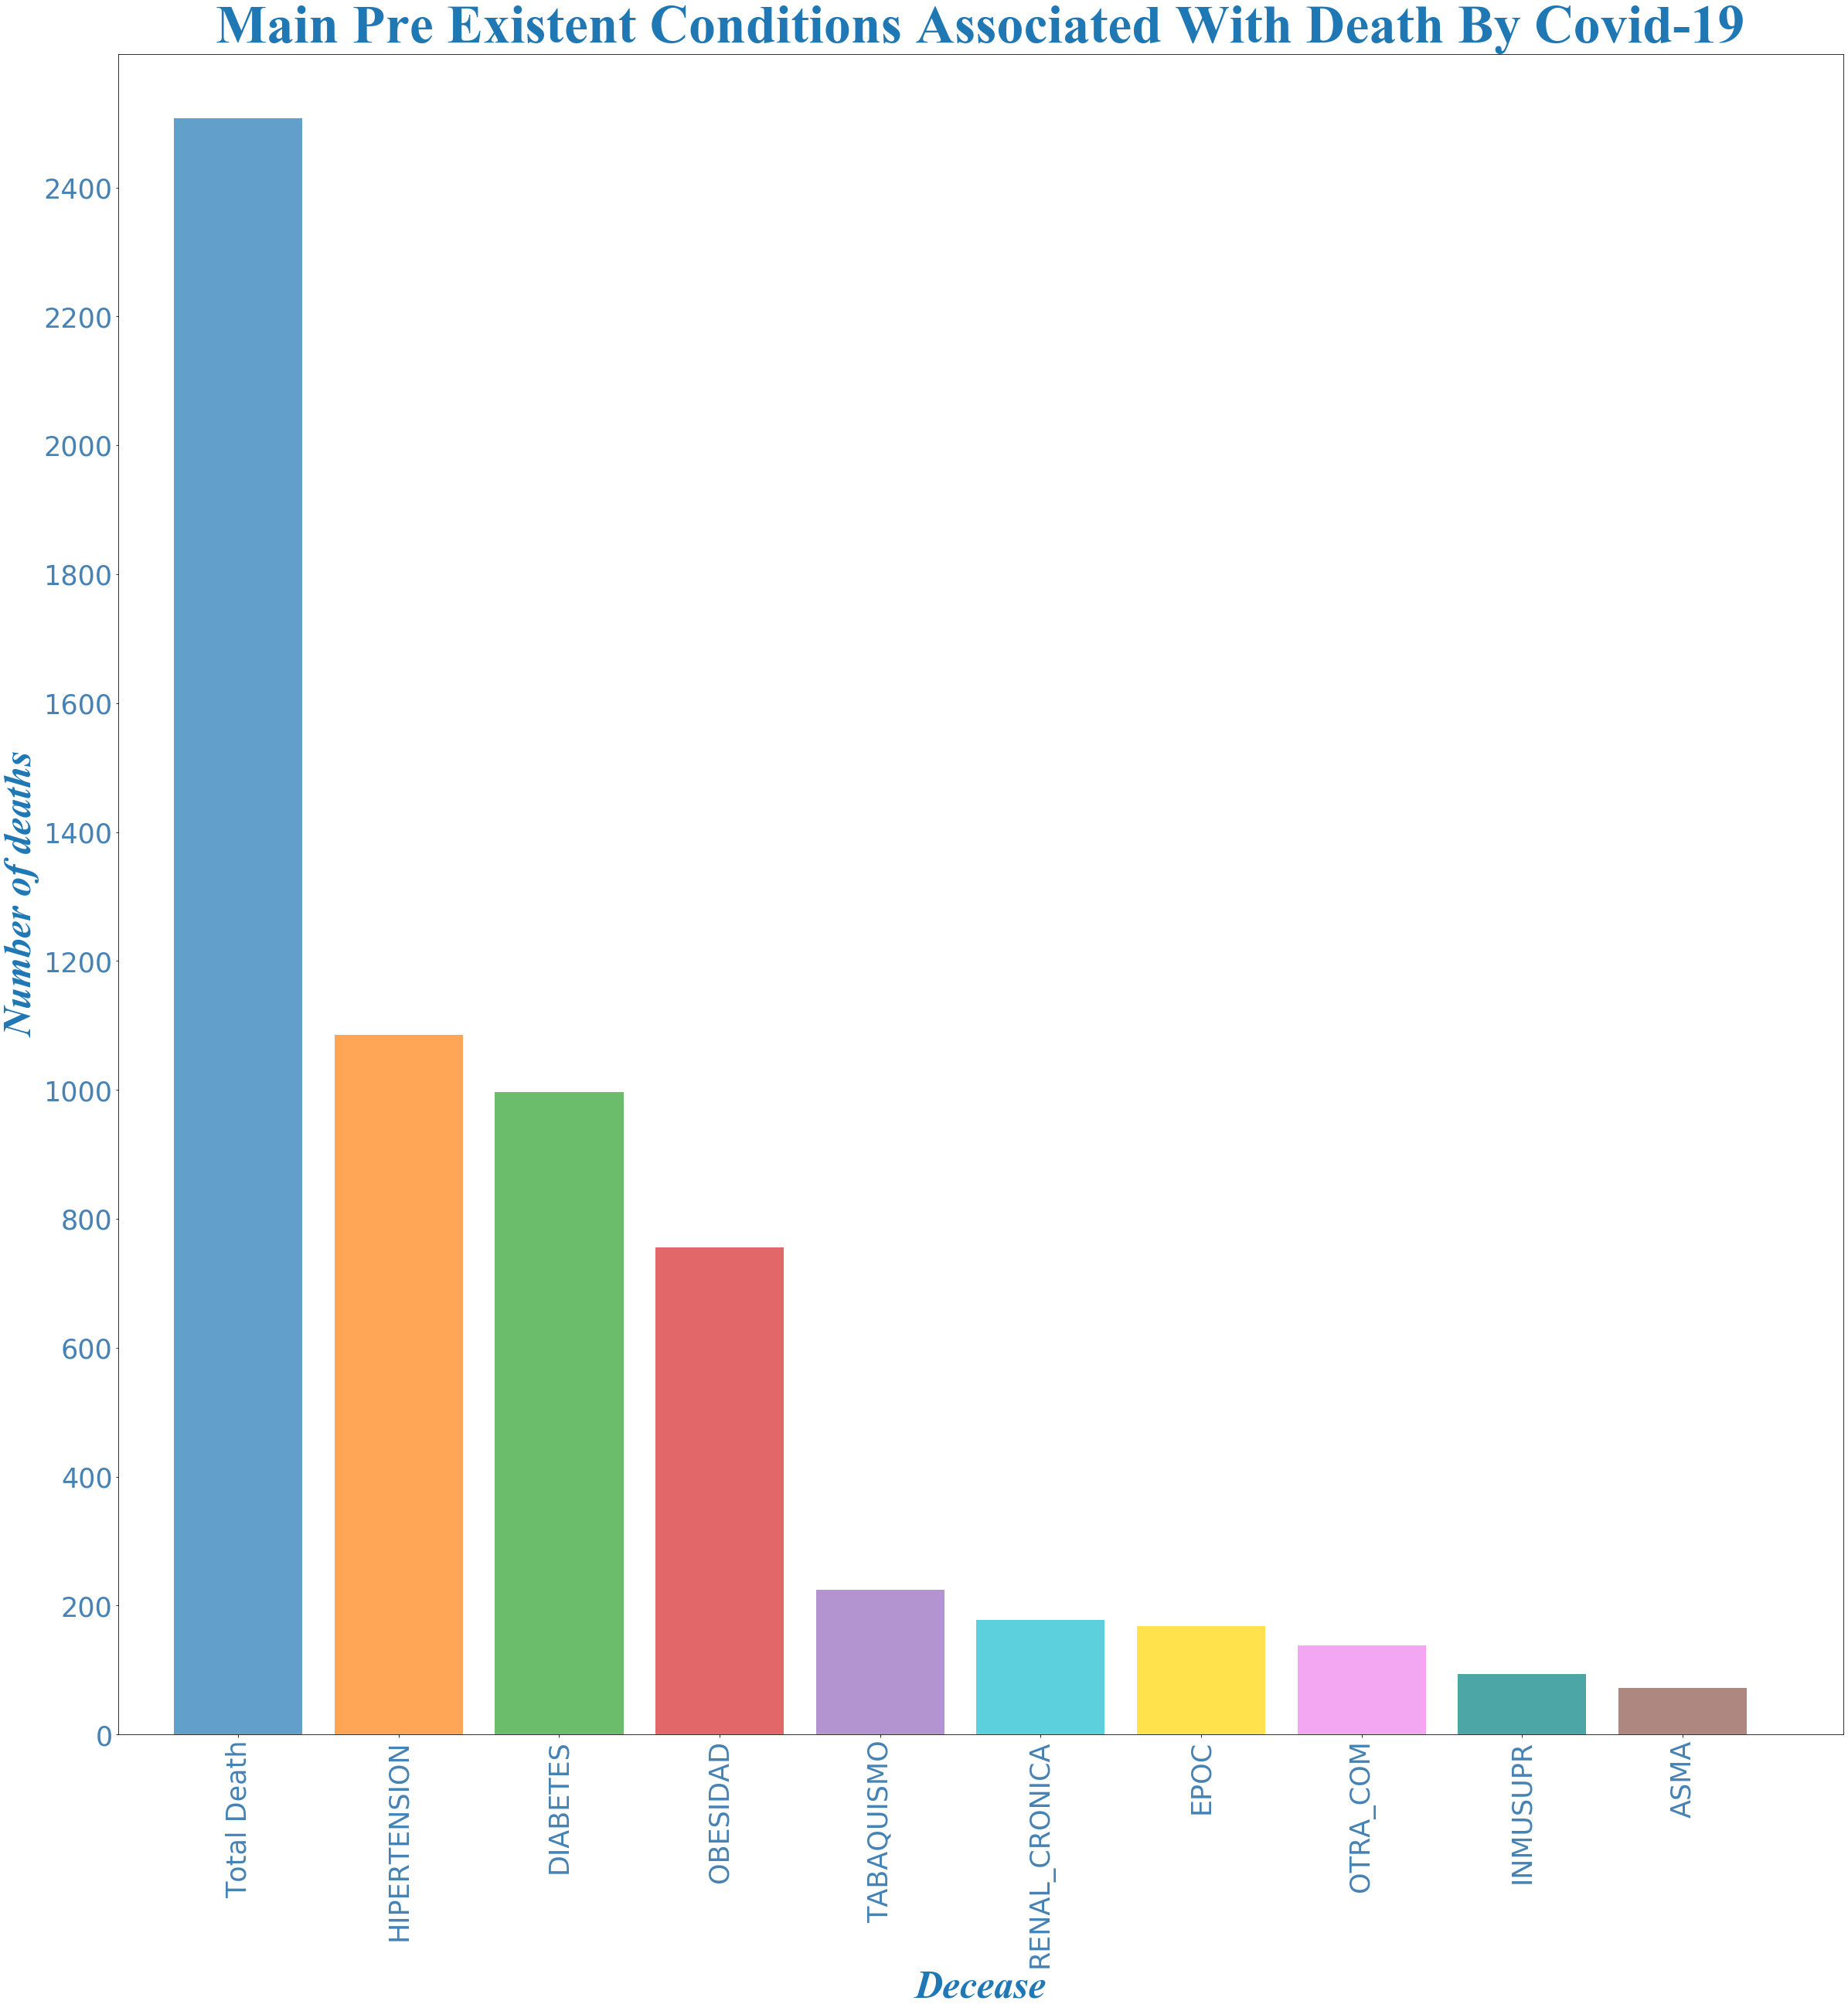

In [80]:
# Generating a plot to show total death and previous conditions
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','gold','violet','teal','tab:brown']
enfermos = [death, HIPERTENSION, DIABETES,OBESIDAD,TABAQUISMO,RENAL_CRONICA,EPOC,OTRA_COM,INMUSUPR,ASMA]
enfermedades = ["Total Death","HIPERTENSION","DIABETES","OBESIDAD","TABAQUISMO","RENAL_CRONICA","EPOC","OTRA_COM","INMUSUPR","ASMA"]
x_axis = np.arange(len(enfermos))
plt.figure(figsize=(40,40))
plt.bar(x_axis, enfermos, color=colors, align='center',width=0.8,alpha = 0.7)
plt.xticks(x_axis, enfermedades, rotation = "vertical",color='steelblue',fontsize=35)
plt.yticks(np.arange(0, 2600, step=200),color='steelblue',fontsize=35)
plt.xlim(-0.75,10)
plt.ylim(0,max(enfermos)+100)
plt.title("Main Pre Existent Conditions Associated With Death By Covid-19",fontsize=70,color='tab:blue', family='Times New Roman')
plt.xlabel("Decease",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.ylabel("Number of deaths",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.savefig('Results_visualizations/COVID-19 Death Distribution.png')
plt.show()

# Correlation between death and diseases

In [81]:
# Read again main DB without cleanup to use base with coding 1 and 0 for analysis 
covid_mx_df2 = pd.read_csv(covid_mx_data, encoding='utf-8')

covid_mx_df2["FECHA_DEF"] = covid_mx_df2["FECHA_DEF"].replace("9999-99-99",0)

for i in range(len(covid_mx_df2)):
       if (covid_mx_df2["FECHA_DEF"][i] != 0):
            covid_mx_df2["FECHA_DEF"][i] = 1
covid_mx_df2    

C:\Users\ododt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,1,4,2,2,2,2,4,1,...,2,2,2,2,99,1,99,Mexico,99,97
1,2020-05-05,108695,1,4,9,2,9,9,15,2,...,1,1,2,2,99,1,99,Mexico,99,2
2,2020-05-05,0342f4,1,12,32,2,31,32,6,2,...,2,1,2,1,2,2,99,Mexico,99,2
3,2020-05-05,0c09bc,1,4,15,2,15,15,58,2,...,2,2,2,1,99,2,99,Mexico,99,2
4,2020-05-05,188377,1,4,9,2,9,9,5,1,...,2,2,2,2,99,2,99,Mexico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,2,4,25,1,16,25,1,1,...,2,2,1,2,99,3,99,México,99,97
105660,2020-05-05,0a9847,2,12,11,2,11,11,20,1,...,2,2,2,2,2,3,99,México,99,97
105661,2020-05-05,1c66c5,1,12,19,2,19,19,39,1,...,2,2,2,2,2,3,99,México,99,97
105662,2020-05-05,1d0929,2,4,2,1,25,2,3,1,...,2,2,2,2,99,3,99,México,99,97


In [82]:
# Change not available data for the most common value in order to have a complete data frame
covid_mx_df2["DIABETES"].replace(98,2,inplace=True)
covid_mx_df2["EPOC"].replace(98,2, inplace=True)
covid_mx_df2["ASMA"].replace(98,2, inplace=True)
covid_mx_df2["INMUSUPR"].replace(98,2,inplace=True)
covid_mx_df2["HIPERTENSION"].replace(98,2, inplace=True)
covid_mx_df2["OTRA_COM"].replace(98,2, inplace=True)
covid_mx_df2["CARDIOVASCULAR"].replace(98,2, inplace=True)
covid_mx_df2["OBESIDAD"].replace(98,2, inplace=True)
covid_mx_df2["RENAL_CRONICA"].replace(98,2, inplace=True)
covid_mx_df2["TABAQUISMO"].replace(98,2, inplace=True)

In [83]:
#Generate a Df with clean data
covid_mx_df2["FECHA_DEF"] = pd.to_numeric(covid_mx_df2["FECHA_DEF"], errors='coerce')

In [84]:
# Make all correlations
death = covid_mx_df2.loc[:,"FECHA_DEF"]
DIABETES = covid_mx_df2.loc[:,"DIABETES"]
correlation = st.pearsonr(death,DIABETES)
DIABETES =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
EPOC = covid_mx_df2.loc[:,"EPOC"]
correlation = st.pearsonr(death,EPOC)
EPOC =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
ASMA = covid_mx_df2.loc[:,"ASMA"]
correlation = st.pearsonr(death,ASMA)
ASMA =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
INMUSUPR = covid_mx_df2.loc[:,"INMUSUPR"]
correlation = st.pearsonr(death,INMUSUPR)
INMUSUPR =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
HIPERTENSION = covid_mx_df2.loc[:,"HIPERTENSION"]
correlation = st.pearsonr(death,HIPERTENSION)
HIPERTENSION =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
OTRA_COM = covid_mx_df2.loc[:,"OTRA_COM"]
correlation = st.pearsonr(death,OTRA_COM)
OTRA_COM =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
CARDIOVASCULAR = covid_mx_df2.loc[:,"CARDIOVASCULAR"]
correlation = st.pearsonr(death,CARDIOVASCULAR)
CARDIOVASCULAR =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
OBESIDAD = covid_mx_df2.loc[:,"OBESIDAD"]
correlation = st.pearsonr(death,OBESIDAD)
OBESIDAD =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
RENAL_CRONICA = covid_mx_df2.loc[:,"RENAL_CRONICA"]
correlation = st.pearsonr(death,RENAL_CRONICA)
RENAL_CRONICA =correlation[0]

death = covid_mx_df2.loc[:,"FECHA_DEF"]
TABAQUISMO = covid_mx_df2.loc[:,"TABAQUISMO"]
correlation = st.pearsonr(death,TABAQUISMO)
TABAQUISMO =correlation[0]

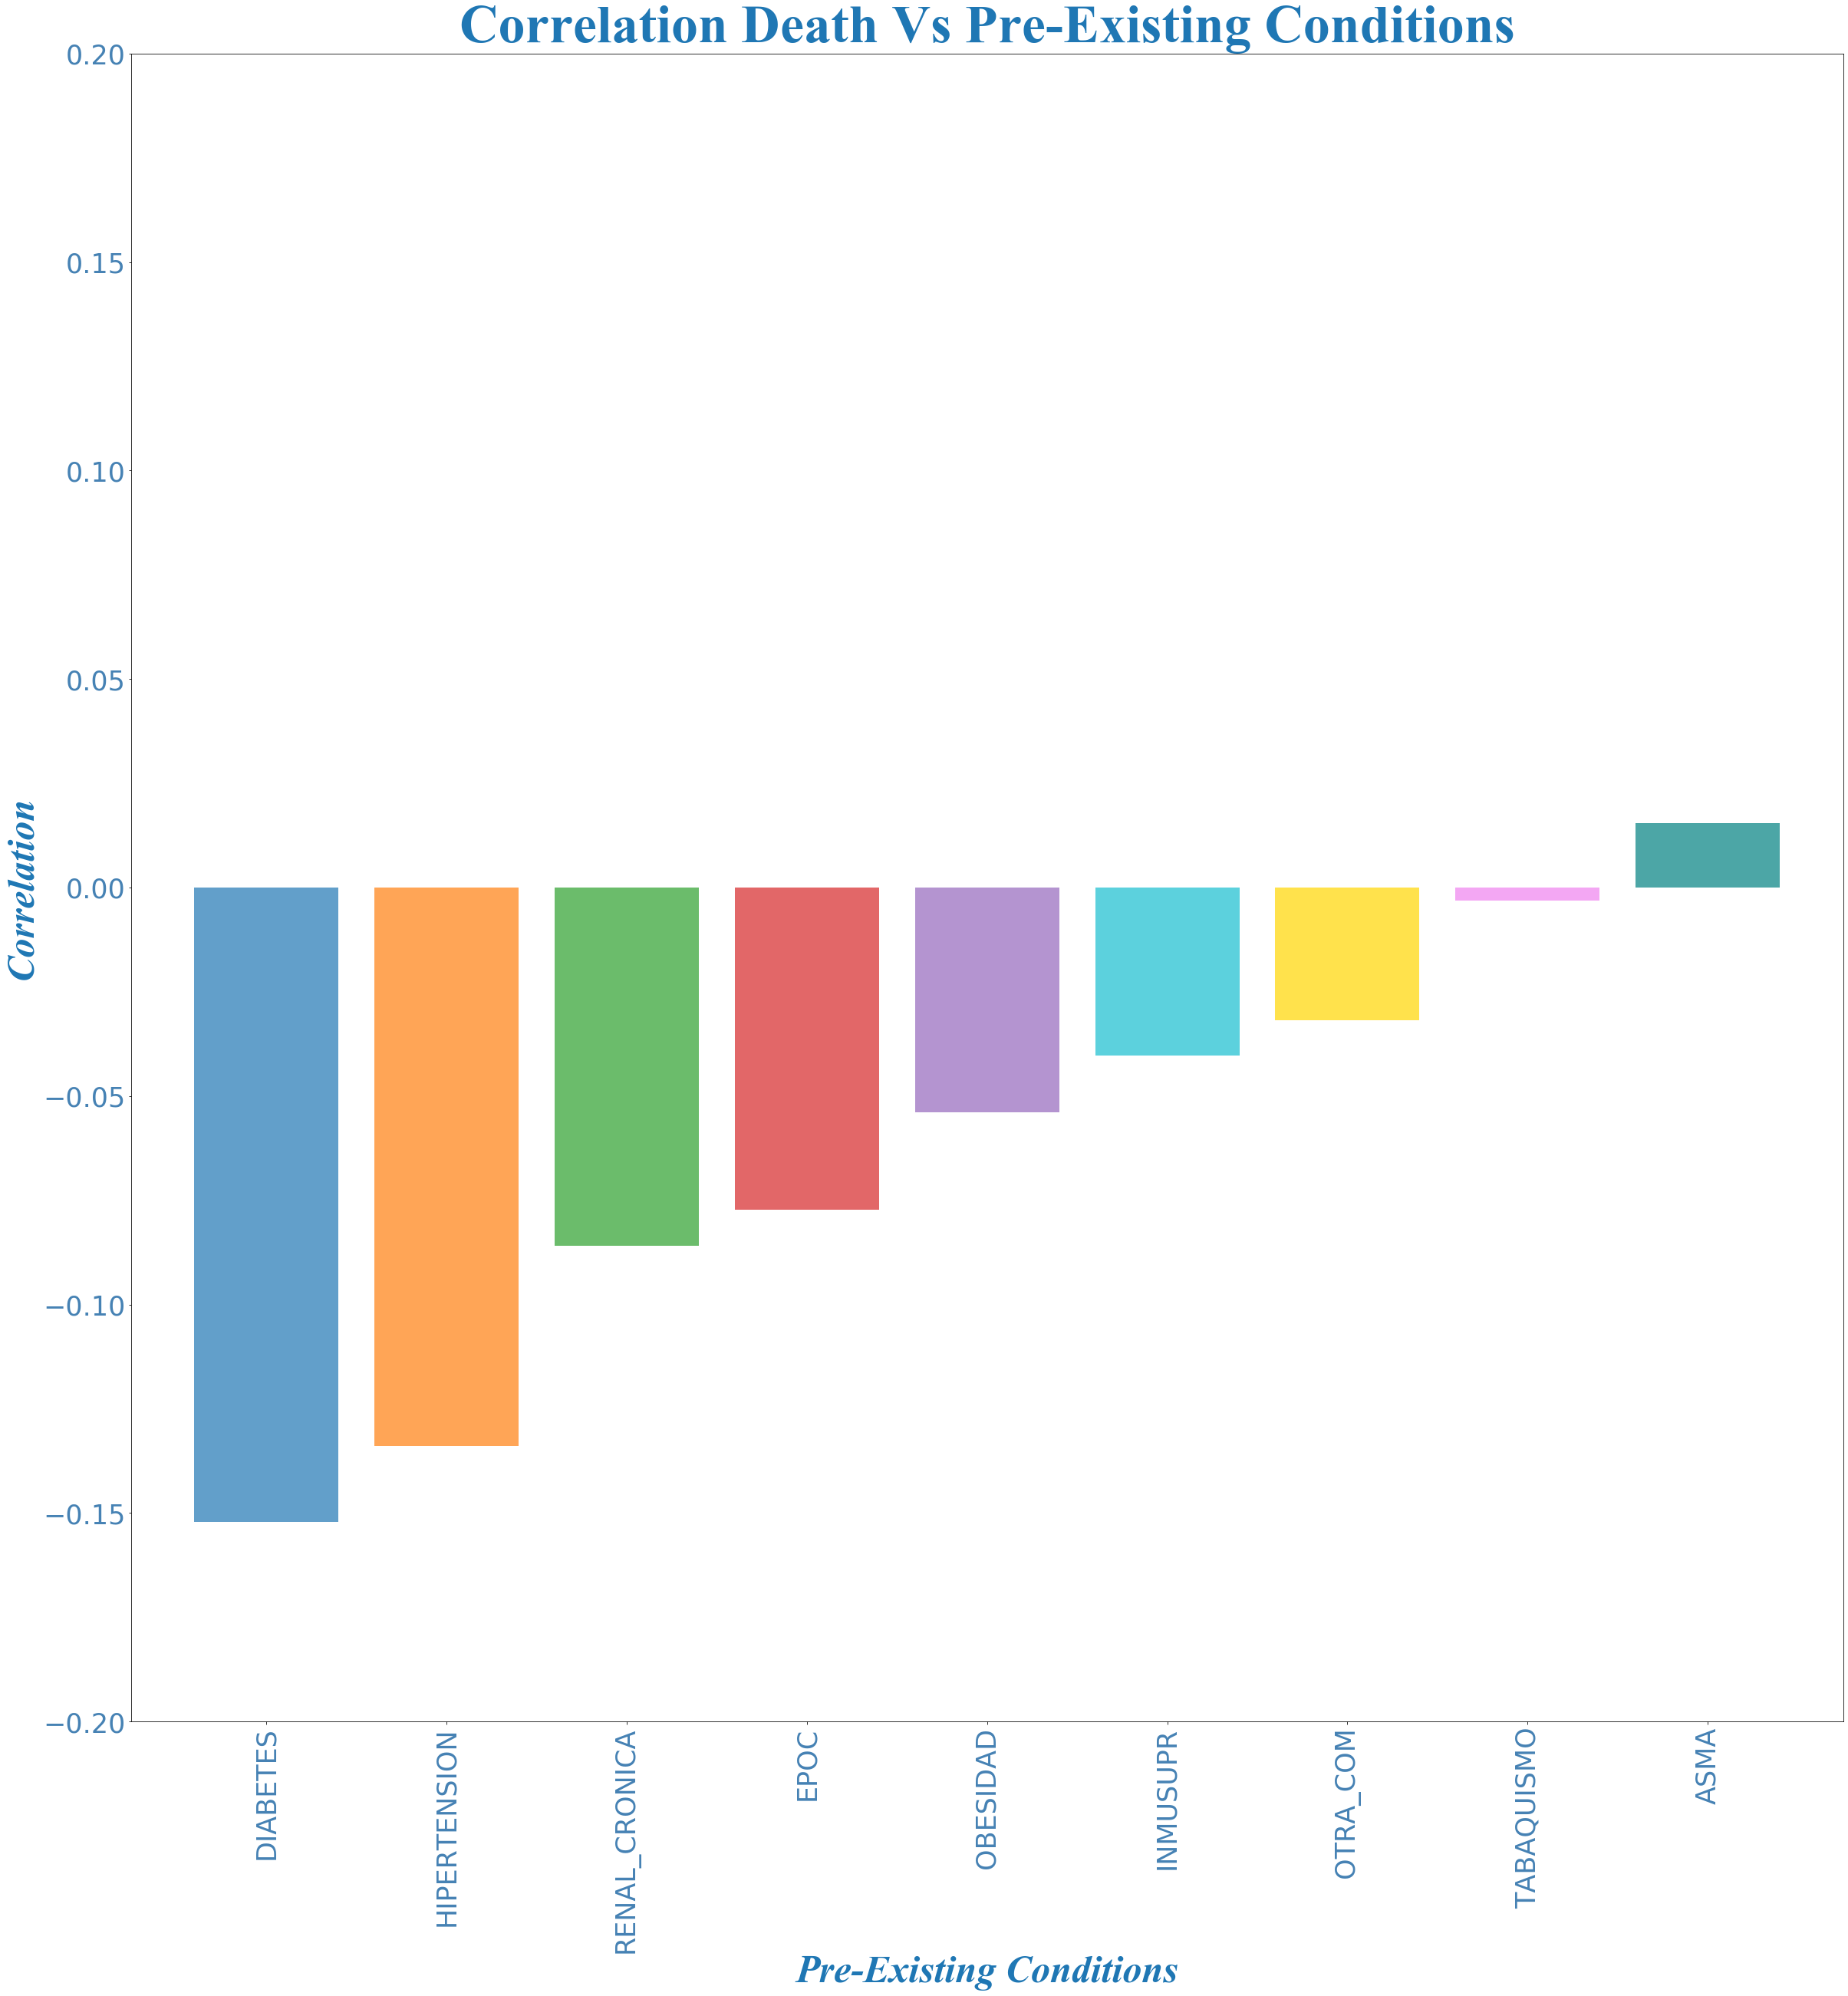

In [85]:
# Generating a plot to show correlation between total death and previous conditions
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','gold','violet','teal']
enfermos = [DIABETES,HIPERTENSION,RENAL_CRONICA,EPOC,OBESIDAD,INMUSUPR,OTRA_COM,TABAQUISMO,ASMA]
enfermedades = ["DIABETES","HIPERTENSION","RENAL_CRONICA","EPOC","OBESIDAD","INMUSUPR","OTRA_COM","TABAQUISMO","ASMA"]
x_axis = np.arange(len(enfermos))
plt.figure(figsize=(40,40))
plt.bar(x_axis, enfermos, color=colors, align='center',width=0.8, alpha = 0.7)
plt.xticks(x_axis, enfermedades, rotation = "vertical",color='steelblue',fontsize=35)
plt.yticks(color='steelblue',fontsize=35)
plt.xlim(-0.75,8.75)
plt.ylim(-0.2,0.2)
plt.title("Correlation Death Vs Pre-Existing Conditions",fontsize=70,color='tab:blue', family='Times New Roman')
plt.xlabel("Pre-Existing Conditions",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.ylabel("Correlation",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.savefig("Results_visualizations/COVID-19 Correlation.png")
plt.show()

# Death probability

In [86]:
# Set new Dataframe with probability conditionals
probabilidad = covid_mx_df2[covid_mx_df2["RESULTADO"] == 1]
totalContagiados = probabilidad.shape[0]
probabilidad = probabilidad[probabilidad["FECHA_DEF"] == 1]
probabilidad.shape

(2507, 35)

In [87]:
# Estimate all probabilities
DIABETES = (len(probabilidad[probabilidad["DIABETES"] == 1])/ totalContagiados)*100
EPOC = (len(probabilidad[probabilidad["EPOC"] == 1])/ totalContagiados)*100
ASMA = (len(probabilidad[probabilidad["ASMA"] == 1])/ totalContagiados)*100
INMUSUPR = (len(probabilidad[probabilidad["INMUSUPR"] == 1])/ totalContagiados)*100
HIPERTENSION = (len(probabilidad[probabilidad["HIPERTENSION"] == 1])/ totalContagiados)*100
OTRA_COM = (len(probabilidad[probabilidad["OTRA_COM"] == 1])/ totalContagiados)*100
OBESIDAD = (len(probabilidad[probabilidad["OBESIDAD"] == 1])/ totalContagiados)*100
RENAL_CRONICA = (len(probabilidad[probabilidad["RENAL_CRONICA"] == 1])/ totalContagiados)*100
TABAQUISMO = (len(probabilidad[probabilidad["TABAQUISMO"] == 1])/ totalContagiados)*100

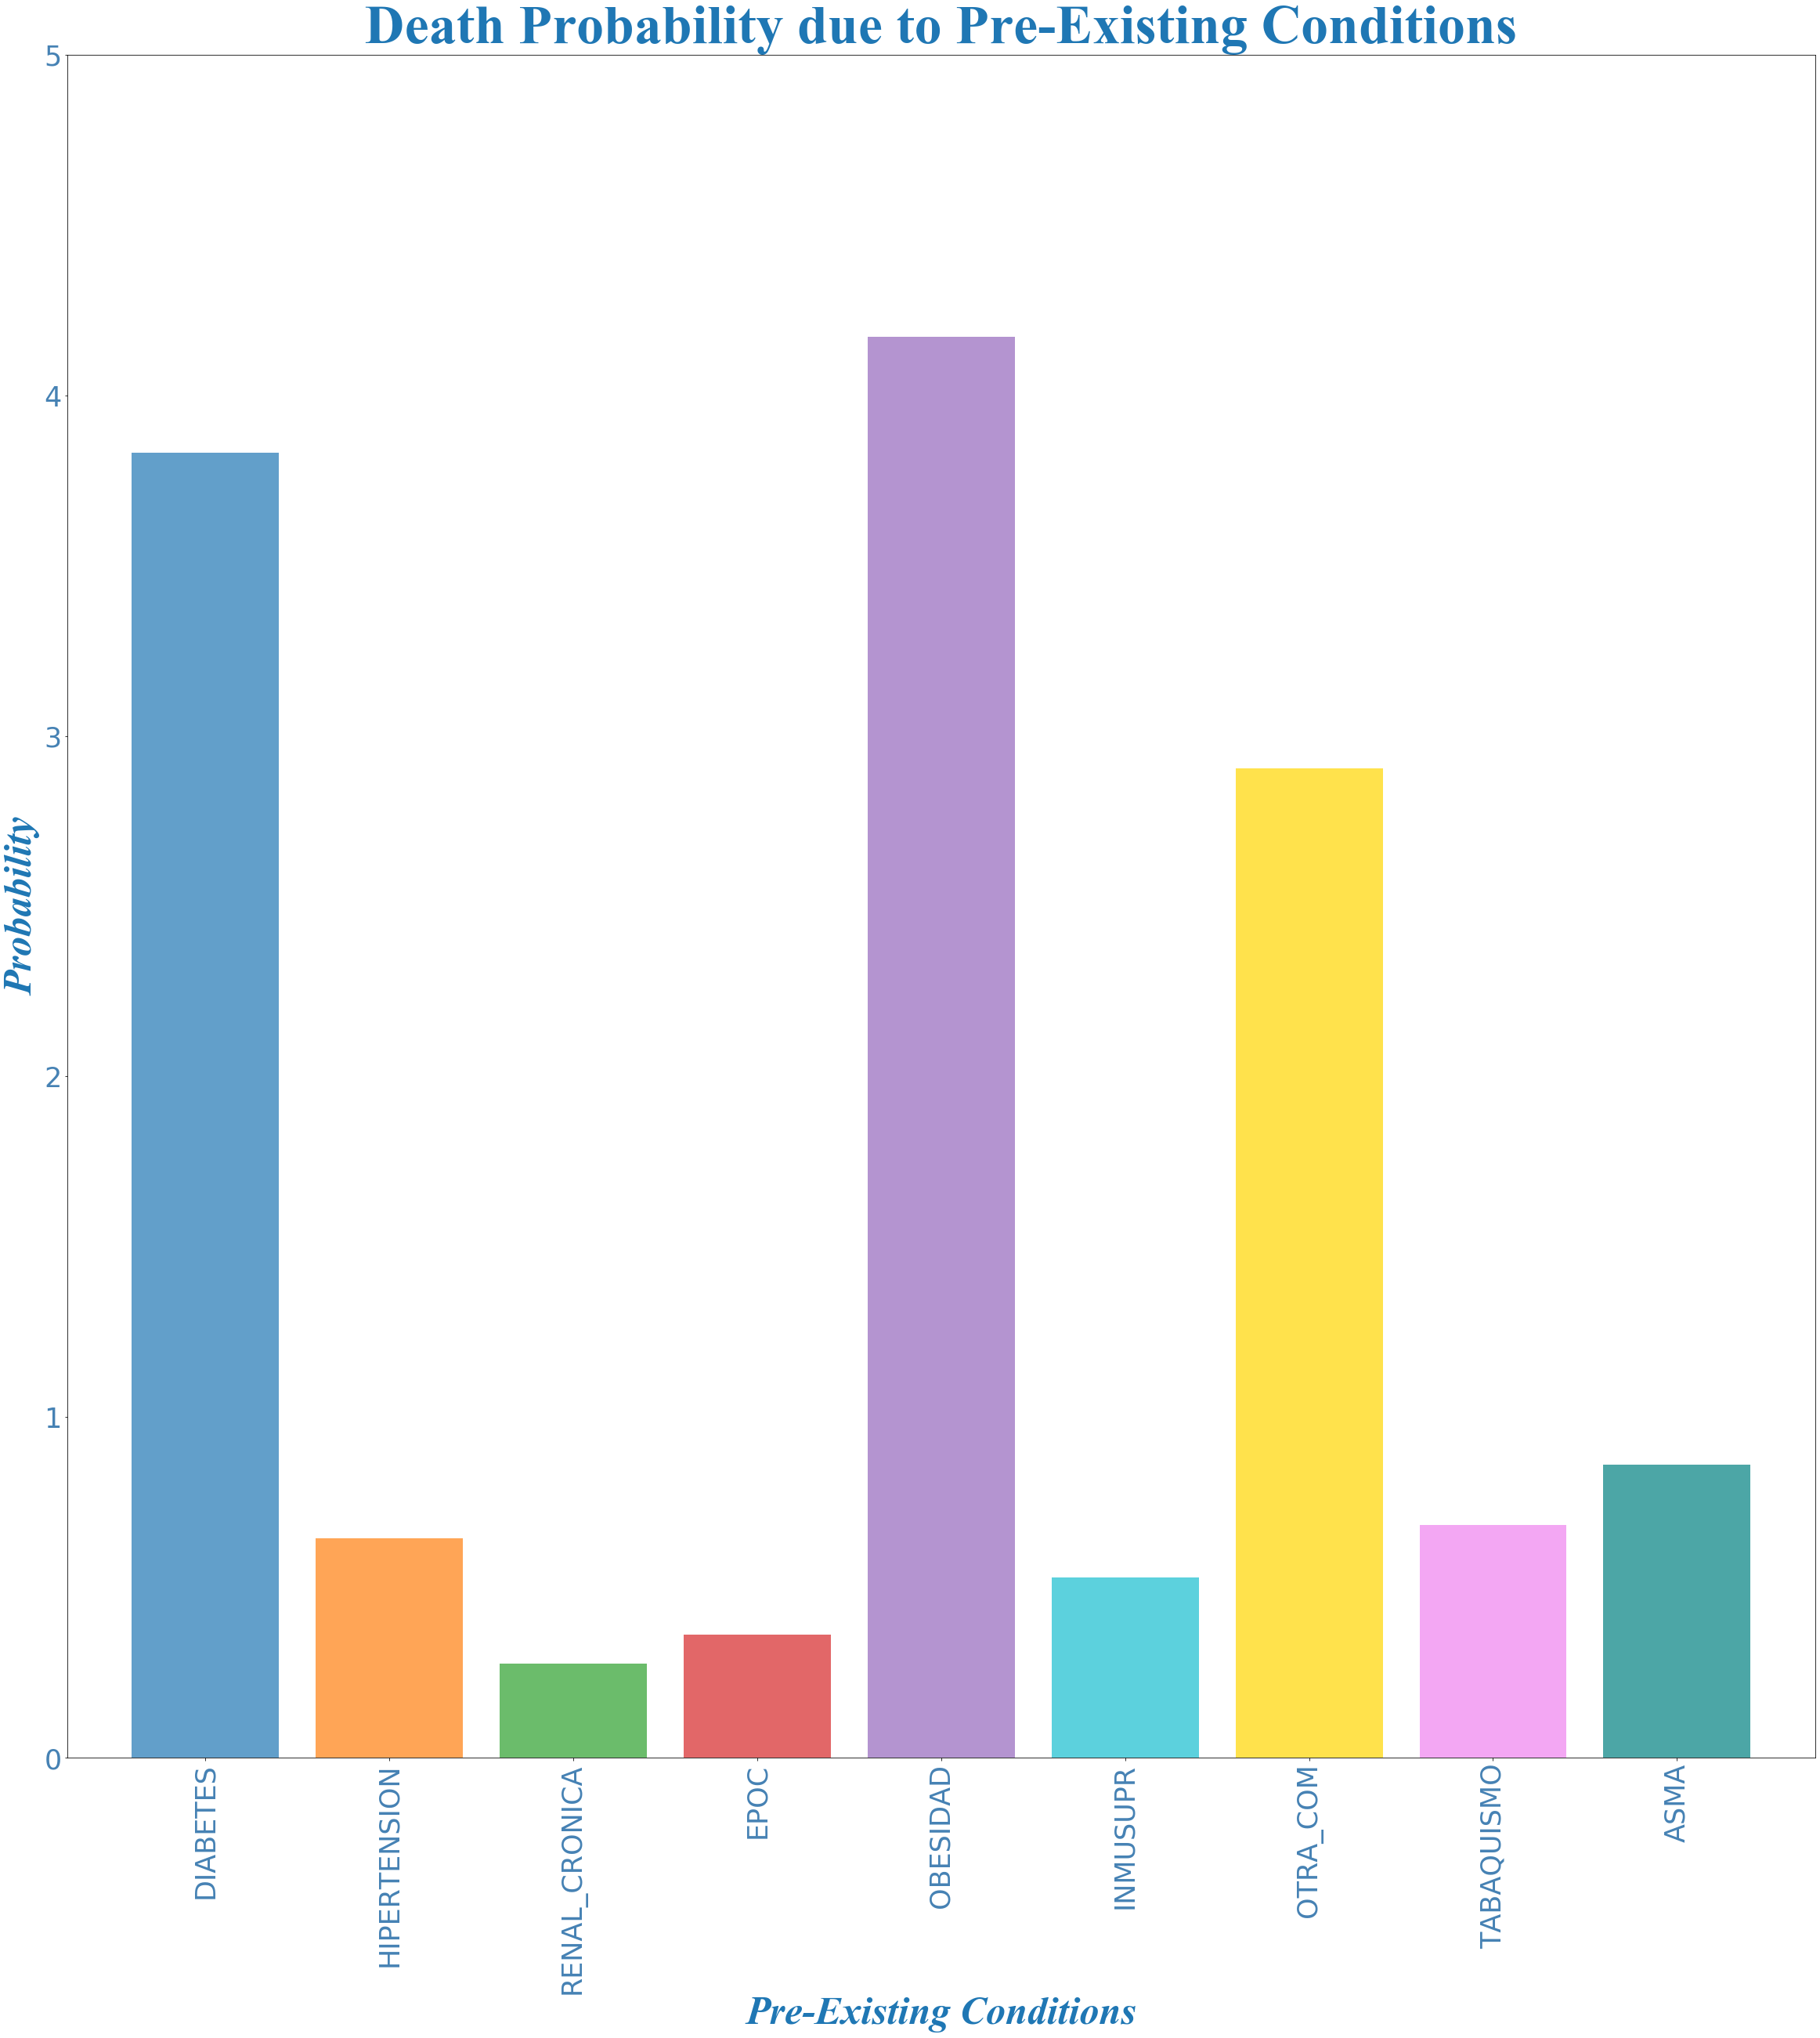

In [88]:
# Generating a plot to show death probability due to previous conditions
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','gold','violet','teal']
enfermos = [DIABETES,EPOC,ASMA,INMUSUPR, HIPERTENSION, OTRA_COM, OBESIDAD, RENAL_CRONICA, TABAQUISMO]
x_axis = np.arange(len(enfermos))
plt.figure(figsize=(40,40))
plt.bar(x_axis, enfermos, color=colors, align='center', width=0.8, alpha = 0.7)
plt.xticks(x_axis, enfermedades, rotation = "vertical",color='steelblue',fontsize=35)
plt.yticks(color='steelblue',fontsize=35)
plt.xlim(-0.75,8.75)
plt.ylim(0,5)
plt.title("Death Probability due to Pre-Existing Conditions",fontsize=70,color='tab:blue', family='Times New Roman')
plt.xlabel("Pre-Existing Conditions",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.ylabel("Probability",style='italic',color='tab:blue',family='Times New Roman',fontsize=50)
plt.savefig("Results_visualizations/Death probability")
plt.show()

# Cases by states, municipalities, hospitals and mortality

#### Generate list of all cities with lat lng coordinates using google Geocoding API

In [89]:
# #get lat lngs data for municipalities in the top 5 states
# geocode_url = "https://maps.googleapis.com/maps/api/geocode/json"

# params = {
#     "key": google_maps_api_key,
# }

# response_list = []

# #get list of unique city and state combos and their lat lng values
# unique_cities = []
# unique_lats = []
# unique_lngs = []

# for index, row in covid_positive_df.iterrows():
#     city_state = row["MUNICIPIO_RES"] + ', ' + row["ENTIDAD_RES"]
#     if(city_state not in unique_cities):
#         unique_cities.append(city_state)

# # iterate through all city_states to get lat lng info for each city.
# for city in unique_cities:
#     print("Searching for Lat Lng info "+ city +"...")
#     params["address"] = city
#     response = requests.get(geocode_url, params= urllib.parse.urlencode(params))
#     response_json = response.json()
#     # Check that city has entry on OpenWeatherMap.
#     if response_json['status'] == "OK" and len(response_json["results"]):
#         #check address components to see if we got a locality (city)
#         city_found = False
#         for adr_comp in response_json["results"][0]["address_components"]:
#             if('locality' in adr_comp["types"]):
#                 city_found = True
#         if(city_found):
#             unique_lats.append((response_json["results"][0]["geometry"]["location"]["lat"]))
#             unique_lngs.append((response_json["results"][0]["geometry"]["location"]["lng"]))
#         else:
#             print("City not found. Skipping...")
#             unique_lats.append(0)
#             unique_lngs.append(0)
#     else:
#         print("No Results, Skipping...")
#         unique_lats.append(0)
#         unique_lngs.append(0)

# #make new data frame with city names and lat lngs
# cities_df = pd.DataFrame({
#     "Name": unique_cities,
#     "Lat" : unique_lats,
#     "Lng" : unique_lngs,
# })
# #filter out the empty lat longs
# cities_df = cities_df.loc[cities_df["Lat"] > 0,:]

# #save cities_df to seperate csv for future use without API calls
# cities_df.to_csv('cities_mx_lat_lngs_data.csv', index=False)
# cities_df

#### Generate list of all hospitals with lat lng coordinates using google Nearby Search API

In [90]:
# #get hospital locations for markers
# google_nearby_search_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# parameters = {
#             "types": "hospital",
#             "radius": 3000,
#             "key": google_maps_api_key}

# hospitals = {}

# for index, row in cities_df.iterrows():
#     latitude = row["Lat"]
#     longitude = row["Lng"]
#     parameters["location"] = f"{latitude},{longitude}"
    
#     print(f"Searching for hospitals near {row['Name']}.")
#     response = requests.get(google_nearby_search_url, params=parameters).json()
#     results = response["results"]
#     try:
#         print(results)
#         hospitals[row["Name"]] = results
#     except (KeyError, IndexError):
#         print("No results, skipping.")
        
# hospitals

#### Import dependencies and cleaned covid data csv

In [91]:
# Import API key (config is added to gitignore to protect Personal API Keys, user your own to run commands)
from config2 import google_maps_api_key2

csv_path = "Resources/COVID_Clean_Data.csv"
covid_df = pd.read_csv(csv_path)

# To show all columns in previews
pd.options.display.max_columns = 500
covid_df.head()

,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,2020-03-18,9999-99-99,No Aplica,No,29,Mexicana,No Aplica,No,No,No,No,No,No,No,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,2020-03-23,2020-04-11,No,No,64,Mexicana,No Aplica,No,No,Si,Si,No,Si,No,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,2020-03-28,2020-03-30,Si,Si,64,Mexicana,No Aplica,No,No,No,Si,No,No,No,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,2020-03-29,9999-99-99,No,Si,41,Mexicana,No Aplica,No,No,No,No,No,No,No,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,2020-03-26,9999-99-99,No Aplica,No,69,Mexicana,No Aplica,No,Si,No,No,No,No,No,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica


#### Import cities lat lng csv created from API previously

In [92]:
csv_path = "cities_mx_lat_lngs_data.csv"
cities_df = pd.read_csv(csv_path)
cities_df.head()

,Name,Lat,Lng
0,"Juarez, Ciudad De Mexico",19.426753,-99.161845
1,"Santiago Amoltepec, Oaxaca",16.641227,-97.495875
2,"Jesus Maria, Ciudad De Mexico",19.428556,-99.128511
3,"Jesus Maria, Colima",19.245234,-103.724087
4,"Pantepec, Oaxaca",20.520016,-97.938857


#### Import Hospitals lat lng csv created from API previously

In [93]:
csv_path = "unique_hospitals_mexico.csv"
unique_hospitals_df = pd.read_csv(csv_path)
unique_hospitals_df.head()

,name_full,lat,lng,types
0,"Unidad Quirúrgica Montgober, Juarez, Ciudad De...",19.415515,-99.157304,"['hospital', 'health', 'point_of_interest', 'e..."
1,Hospital Santiago Amoltepec. En proceso de con...,16.652620,-97.500731,"['hospital', 'health', 'point_of_interest', 'e..."
2,"Hospitalito, Jesus Maria, Ciudad De Mexico",19.447811,-99.112463,"['hospital', 'health', 'point_of_interest', 'e..."
3,"Unión Médica Adame, Jesus Maria, Colima",19.244757,-103.723690,"['hospital', 'health', 'point_of_interest', 'e..."
4,"UMR Pantepec, Pantepec, Oaxaca",20.521237,-97.939476,"['hospital', 'health', 'point_of_interest', 'e..."


#### Analysis of data to find states with the most cases and number of deaths in each state

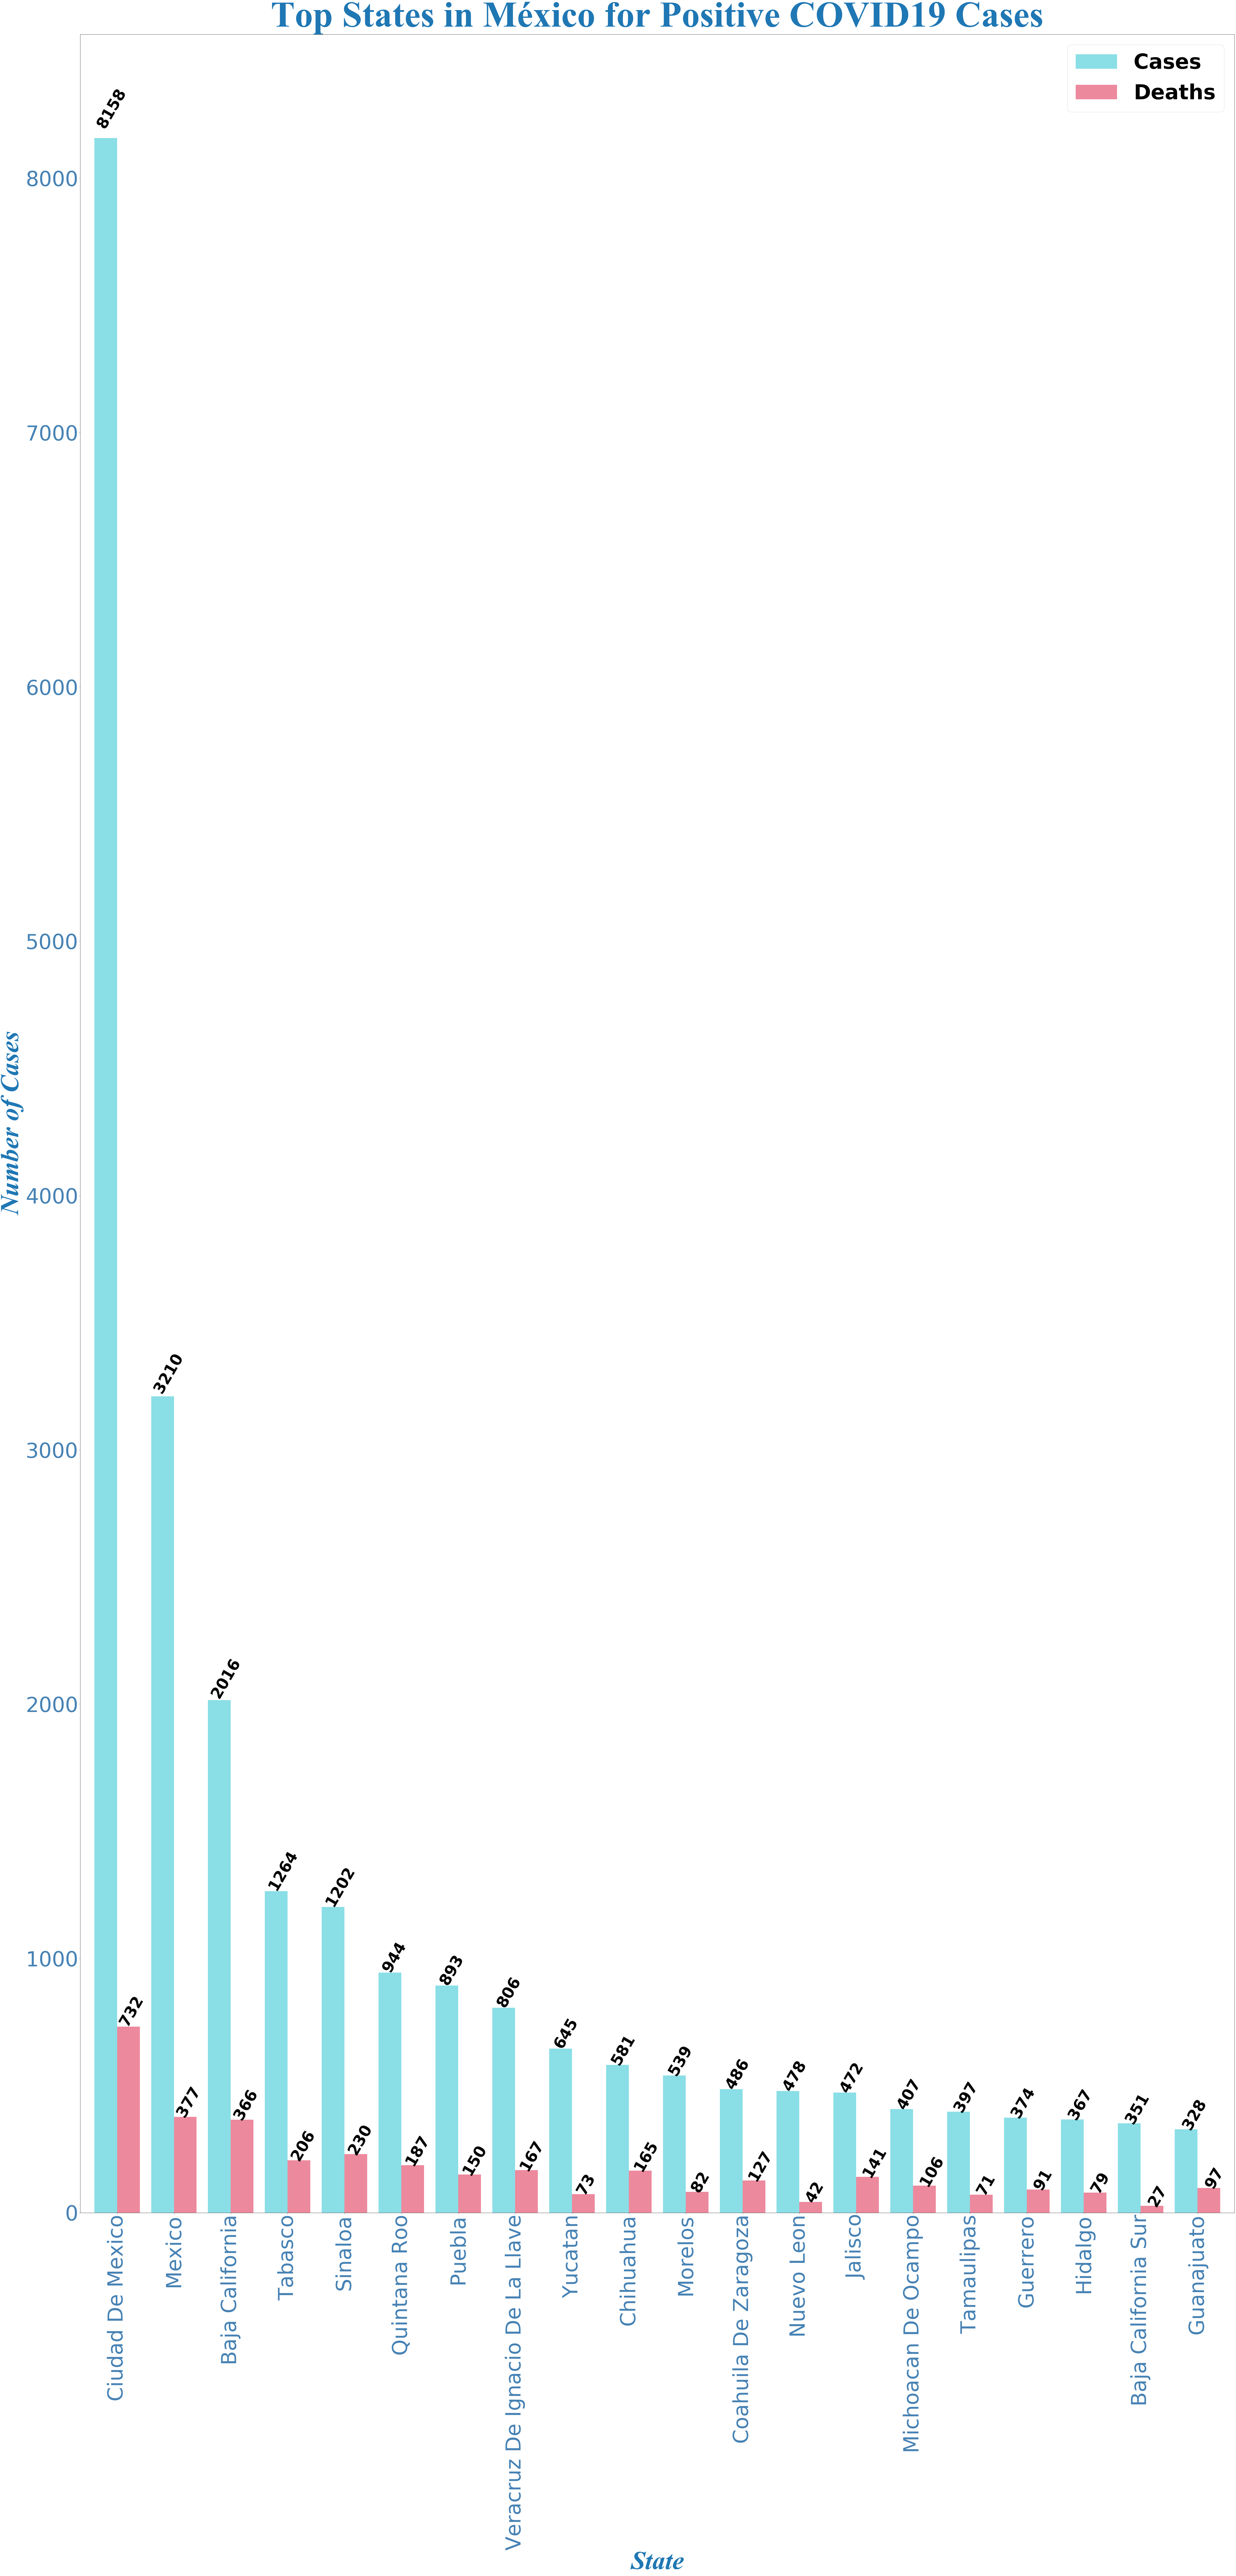

In [94]:
# Created new dataframe filtered from covid data for positive cases only
covid_positive_df = covid_df.loc[covid_df["RESULTADO"] == "Positivo SARS-CoV-2",:]
covid_positive_df

# Create new dataframe filtered for fatalities cases only
covid_deaths_df = covid_df.loc[covid_df["FECHA_DEF"] != "9999-99-99",:]
covid_deaths_df

# Groupby state and get count of positive cases by state
cases_by_state = covid_positive_df.groupby("ENTIDAD_UM")["ID_REGISTRO"].count().sort_values(ascending=False)

# Groupby state and get count of deaths by state
deaths_by_state = covid_deaths_df.groupby("ENTIDAD_UM")["ID_REGISTRO"].count().sort_values(ascending=False)

# Merge grouped results into one dataframe
case_to_death_by_state_df = pd.merge(cases_by_state, deaths_by_state, on= "ENTIDAD_UM",how="outer")
case_to_death_by_state_df = case_to_death_by_state_df.rename(columns={"ID_REGISTRO_x":"Cases","ID_REGISTRO_y":"Deaths"})
case_to_death_by_state_df

# Create a bar chart showing 20 top states for covid cases and number of deaths in each state
colors=['tab:cyan','crimson']
ax = case_to_death_by_state_df.head(20).plot.bar(rot=90,fontsize=12,color=colors,stacked=False, figsize=(80,155),width=0.8, alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() *1.005),rotation=60,fontweight='semibold',fontsize=60)

plt.title(f"Top States in México for Positive COVID19 Cases",fontsize=140,color='tab:blue', family='Times New Roman')
plt.xlabel("State",style='italic',color='tab:blue',family='Times New Roman',fontsize=100)
plt.ylabel("Number of Cases",style='italic',color='tab:blue',family='Times New Roman',fontsize=100)
plt.xticks(rotation = "vertical",color='steelblue',fontsize=80)
plt.yticks(color='steelblue',fontsize=80)
plt.legend(labels=['Cases', 'Deaths'],loc='upper right',prop={'size': 80,'weight':'bold'})

plt.savefig("Results_visualizations/COVID19_bar_top_states_positive_cases.png")
plt.show()

#### Analysis of data to find states with the hightest mortality rates

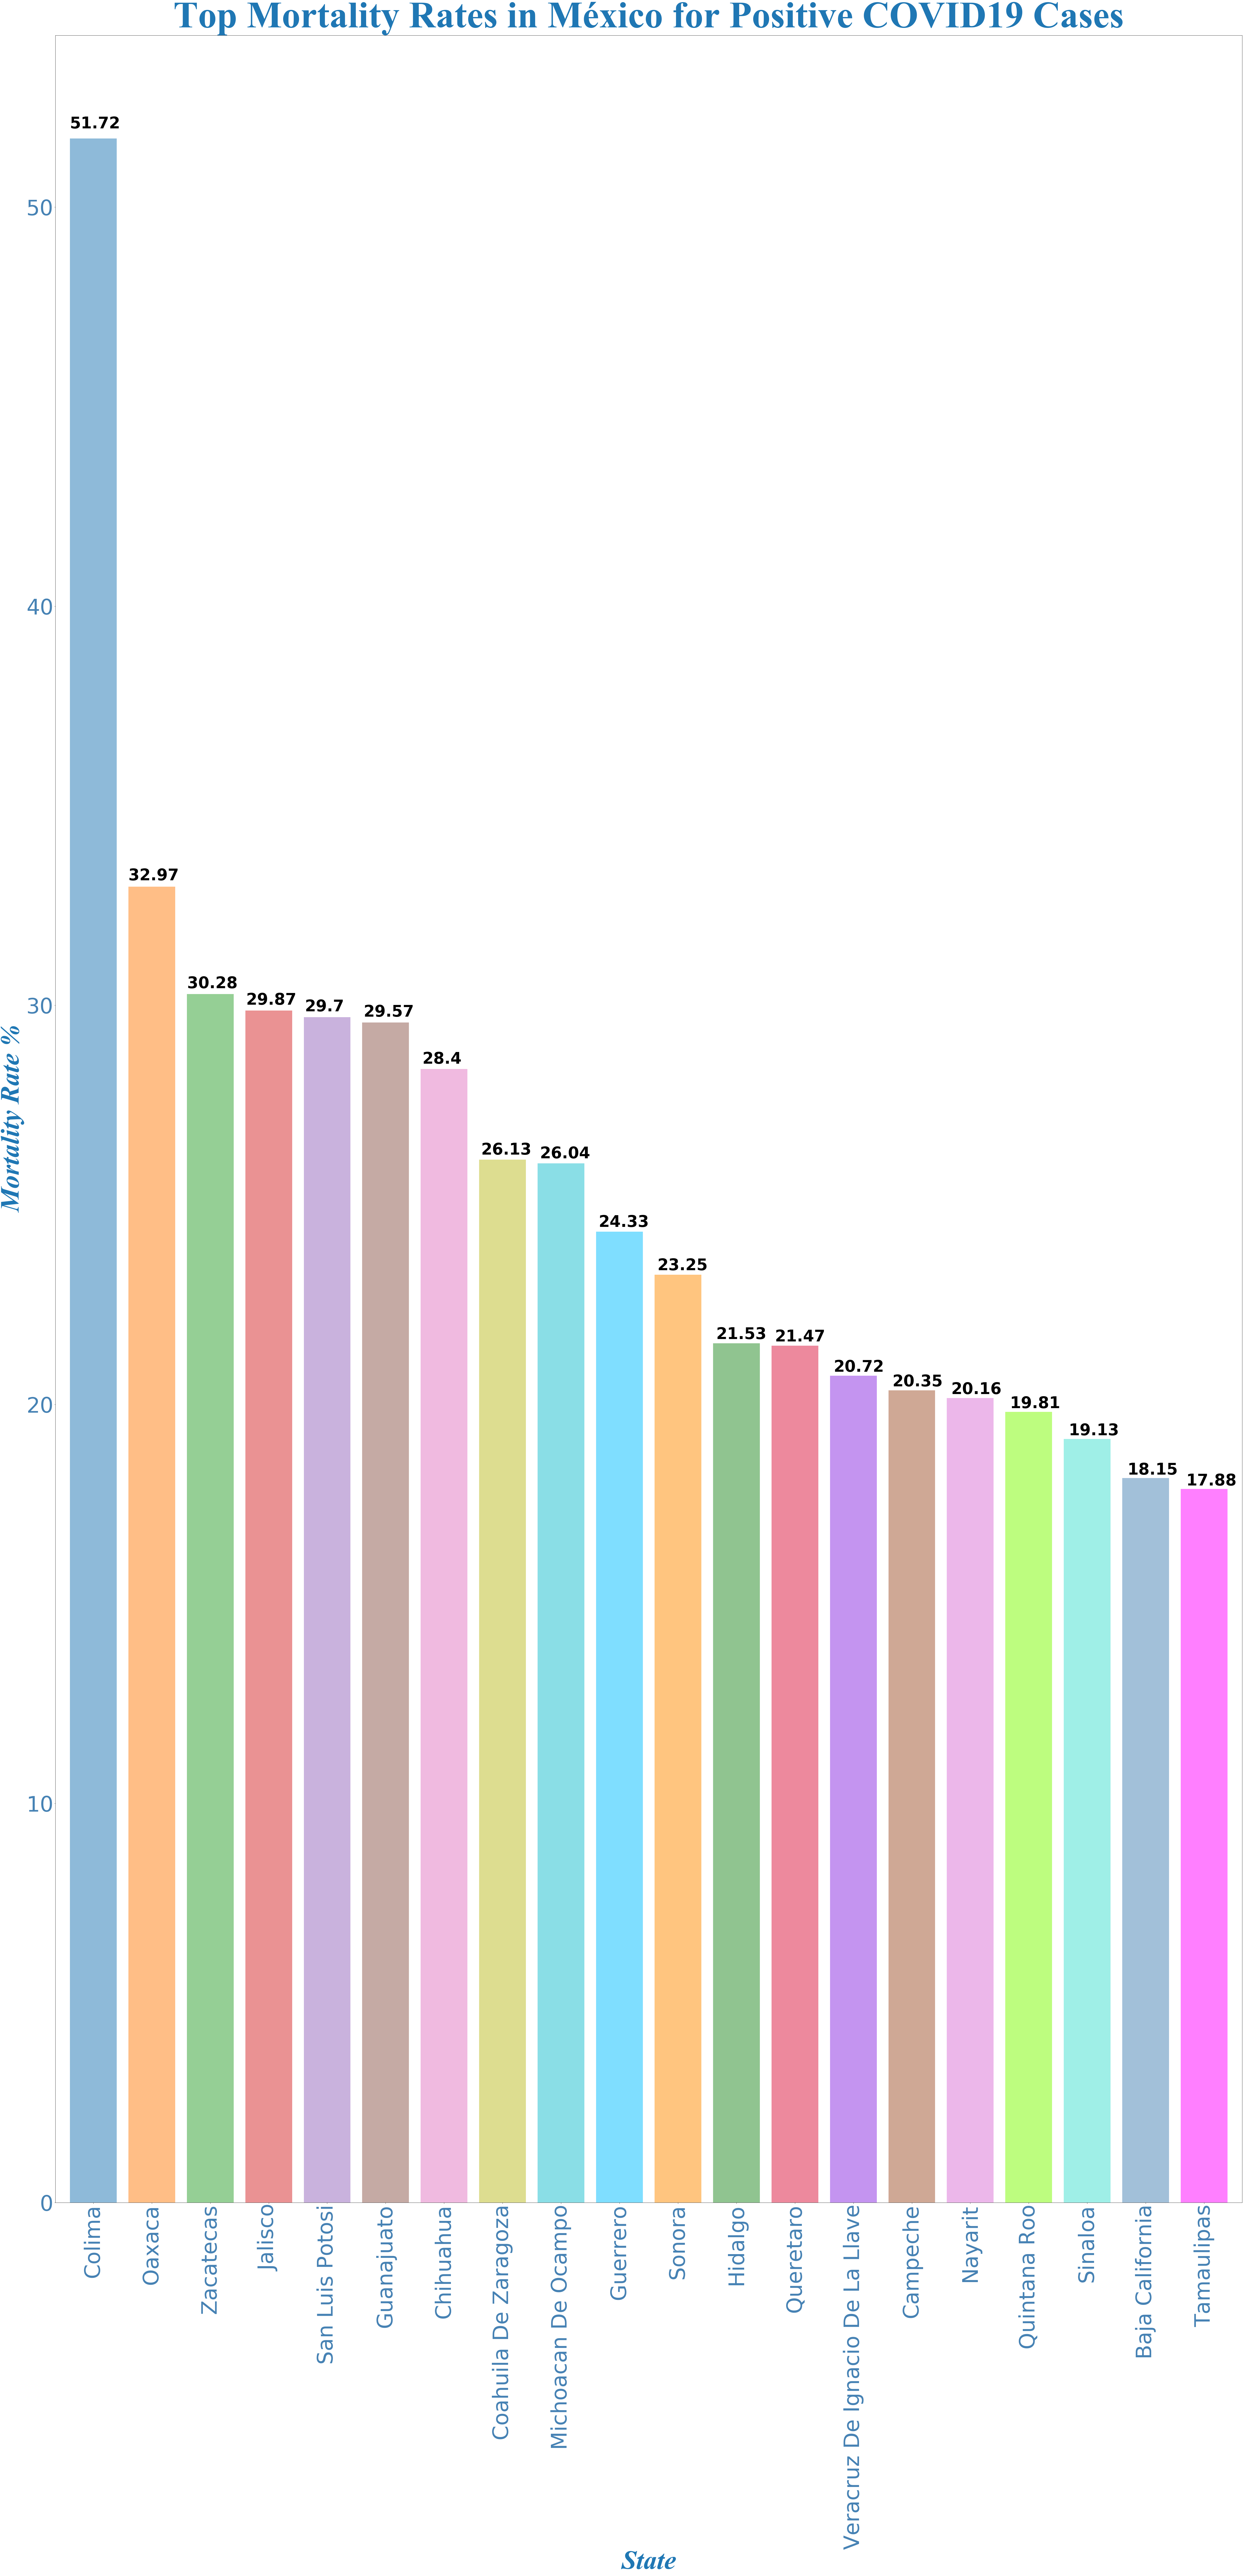

In [95]:
# Calculate mortality rate by state
case_to_death_by_state_df["Mortality Rate %"] = [ round(row["Deaths"] / row["Cases"] * 100,2) for index, row in case_to_death_by_state_df.iterrows()]
# Sort to get the states with the highest mortality rates
case_to_death_by_state_df = case_to_death_by_state_df.sort_values("Mortality Rate %",ascending=False)

# Create a bar chart showing 10 states with highest mortality rates
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:olive','tab:cyan','deepskyblue','darkorange','forestgreen','crimson','blueviolet','sienna','orchid','lawngreen','turquoise','steelblue','magenta']
ax =case_to_death_by_state_df["Mortality Rate %"].head(20).plot.bar(rot=90,fontsize="12",color=colors, stacked=False, figsize=(80,150),width=0.8, alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() *1.005),fontweight='semibold',fontsize=60)
 
plt.title(f"Top Mortality Rates in México for Positive COVID19 Cases",fontsize=140,color='tab:blue', family='Times New Roman')
plt.xlabel("State",style='italic',color='tab:blue',family='Times New Roman',fontsize=100)
plt.ylabel("Mortality Rate %",style='italic',color='tab:blue',family='Times New Roman',fontsize=100)
plt.xticks(rotation = "vertical",color='steelblue',fontsize=80)
plt.yticks(color='steelblue',fontsize=80)

plt.savefig("Results_visualizations/COVID19_bar_top_states_mortality_rates.png")
plt.show()

#### Generate heat map of positive covid19 cases reported in México

In [96]:
# Configure gmaps with API key
gmaps.configure(api_key=google_maps_api_key2)

# Store Latitude and Longitude into coords 
coords = cities_df[["Lat", "Lng"]].astype(float)

# Create new cases column in data frame
cities_df["Cases"] = 0
case_counts = []

# Do a lookup for each city and get number of positive cases reported
for index, row in cities_df.iterrows():
    num_cases = len(covid_positive_df.loc[ (covid_positive_df["MUNICIPIO_RES"] + ', ' + covid_positive_df["ENTIDAD_RES"]) == row["Name"] ])
    case_counts.append(num_cases)

cities_df["Cases"] = case_counts

# Set type to float for Cases column
cities_cases_df = cities_df["Cases"].astype(float)

# Average of highest cases to use as reference for heat map painting
mean_cases = cities_df["Cases"].head(10).mean()
print(mean_cases) 

cities_df = cities_df.sort_values("Cases",ascending=False)
cities_df.head()

258.8


,Name,Lat,Lng,Cases
13,"Rincon De Romos, Ciudad De Mexico",22.228913,-102.320619,1309
2,"Jesus Maria, Ciudad De Mexico",19.428556,-99.128511,871
51,"Pabellon De Arteaga, Sinaloa",22.144474,-102.274822,770
90,"Cosio, Tabasco",17.976432,-92.985261,757
55,"Guerrero, Ciudad De Mexico",19.444523,-99.142542,604


In [97]:
# Configure gmaps heat layer
fig = gmaps.figure(center = (25.311829, -100.148240), zoom_level = 5, layout={
        'width': '950px',
        'height': '500px',
        'padding': '3px',
        'border': '1px solid black'
})
heat_map = gmaps.heatmap_layer(coords, weights=cities_cases_df, 
                                 dissipating=False, max_intensity=mean_cases,
                                 point_radius = 1)
fig.add_layer(heat_map)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))

#### Generate heat map of mortality rates for states in México

In [98]:
# For state lat longs we will use the city lat lng with the highest number of cases
states_list = case_to_death_by_state_df.index.to_list()
states_lats = []
states_lngs = []
states_mort = []

for state_name in states_list:
    for index, row in cities_df.iterrows():
        if(state_name in row["Name"]):
            states_lats.append(row["Lat"])
            states_lngs.append(row["Lng"])
            states_mort.append(case_to_death_by_state_df.loc[state_name]["Mortality Rate %"])
            break

# Create new dataframe for states mortality 
states_mort_df = pd.DataFrame({
    "State": states_list,
    "Lat": states_lats,
    "Lng": states_lngs,
    "Mortality Rate %": states_mort,
})

# Convert to floats for gmaps
coords = states_mort_df[["Lat","Lng"]].astype(float)
state_mort_weights = case_to_death_by_state_df["Mortality Rate %"].astype(float)

# Average of highest mortality rates to use as reference for heat map painting
mean_morts = states_mort_df["Mortality Rate %"].head(5).mean()
print(mean_morts) 

# Configure gmaps heat layer
fig = gmaps.figure(center = (25.311829, -100.148240), zoom_level = 5, layout={
        'width': '950px',
        'height': '500px',
        'padding': '3px',
        'border': '1px solid black'
})
heat_map = gmaps.heatmap_layer(coords, weights=state_mort_weights, 
                                 dissipating=False, max_intensity=mean_morts,
                                 point_radius = 1)
fig.add_layer(heat_map)
fig

34.908


Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))

#### Add layer with hospital locations data over mortality heat map

In [99]:
hosp_locs = unique_hospitals_df[["lat","lng"]]

# Using the template add the hospital data marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name_full}</dd>
<dt>Types</dt><dd>{types}</dd>
</dl>
"""
# Store the DataFrame Row
hosp_info = [info_box_template.format(**row) for index, row in unique_hospitals_df.iterrows()]
# Add marker layer ontop of heat map
hospitals_popups = gmaps.symbol_layer(hosp_locs, scale = 2,info_box_content = hosp_info)
fig.add_layer(hospitals_popups)

markers = gmaps.marker_layer(hosp_locs)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='950px'))